# Imports & file locations

scanpy==1.4.6.dev9+ge632939 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.2 pandas==0.25.3 scikit-learn==0.22 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1
scanpy==1.4.6.dev9+ge632939 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.2 pandas==0.25.3 scikit-learn==0.22 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


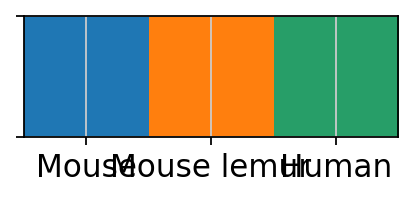

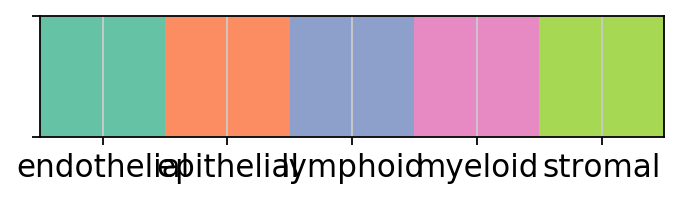

In [1]:
%load_ext autoreload
%autoreload 2

import itertools

import numpy as np
import scanpy 
import scanpy as sc
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.metrics import normalized_mutual_info_score

import anndata

# Olga's modules
import xspecies

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# From https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
# You can use pandas.IndexSlice to facilitate a more natural syntax using :, rather than using slice(None).
idx = pd.IndexSlice


anndata.__version__

scanpy.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
scanpy.logging.print_versions()
scanpy.set_figure_params(frameon=False, color_map='magma_r')

In [2]:
indir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/'

In [3]:
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/data/cross-species/correlation'
outdir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/correlation'
outdirs = outdir_local, outdir_gdrive
# for d in outdirs:
#     ! mkdir -p $d
# !ls -lha $outdir_local

# Load data

In [4]:
%%time
h5ad = f'{indir_local}/concatenated__human-lung--lemur-lung--mouse-lung__10x__one2one_orthologs__unified_compartments__bbknn.h5ad'
adata = scanpy.read_h5ad(h5ad)
adata

adata.obs = adata.obs.replace('nan', np.nan)

## Add compartment_narrow

adata.obs['compartment_narrow'] = adata.obs['compartment_group'].astype(str) + ' - ' + adata.obs['narrow_group'].astype(str)
adata.obs['compartment_narrow'].value_counts().sort_index()

CPU times: user 541 ms, sys: 611 ms, total: 1.15 s
Wall time: 6.81 s


endothelial - Artery                                  791
endothelial - Bronchial Vessel                        319
endothelial - CX3CL1+ Capillary                         4
endothelial - Capillary                              2130
endothelial - Capillary Aerocyte                     1634
endothelial - Capillary Intermediate                  561
endothelial - Lymphatic                               386
endothelial - Uknown Endothelial                      665
endothelial - Undistinguished Endothelial              32
endothelial - Vein                                    683
epithelial - Alveolar Epithelial Type 1               599
epithelial - Alveolar Epithelial Type 2              4266
epithelial - Basal                                    705
epithelial - Ciliated                                1303
epithelial - Club                                     567
epithelial - Goblet                                   138
epithelial - Ionocyte                                  18
epithelial - M

## Plot number of cell types per species

(114, 4)
--- compartment: endothelial ---


/home/olga/code/tabula-microcebus--olgabot/xspecies-lung-de-within-species/notebooks/xspecies.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cell_group] = df[cell_group].astype(str)
/home/olga/code/tabula-microcebus--olgabot/xspecies-lung-de-within-species/notebooks/xspecies.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[groupby] = df[groupby].astype(str)
/home/olga/miniconda3/envs/tabula-microcebus-v2/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not appli

--- compartment: epithelial ---
--- compartment: hematopoietic ---
--- compartment: lymphoid ---


/home/olga/miniconda3/envs/tabula-microcebus-v2/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


--- compartment: megakaryocyte-erythroid ---
--- compartment: myeloid ---
--- compartment: neural ---
--- compartment: stromal ---


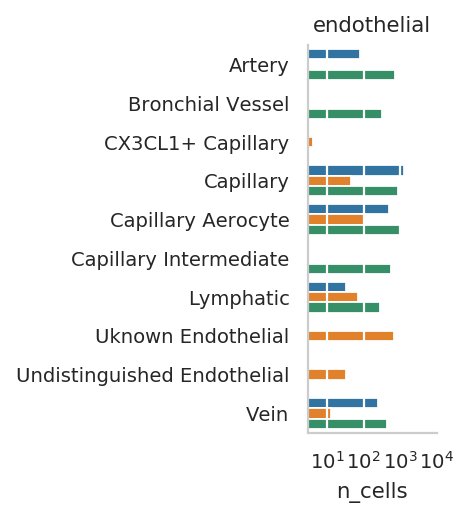

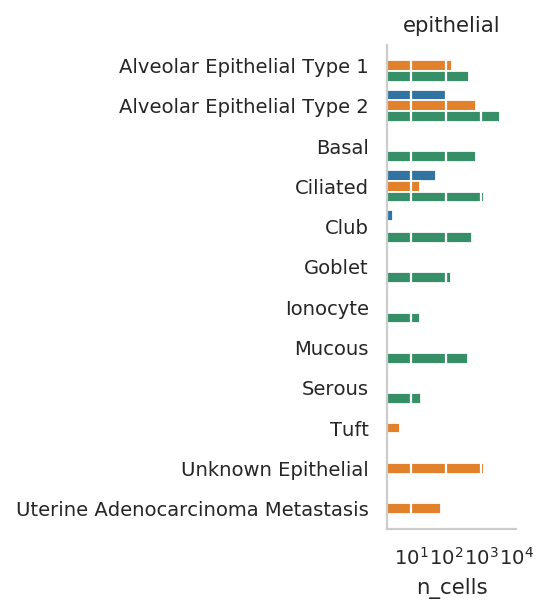

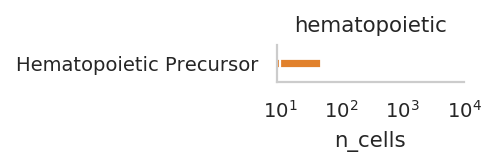

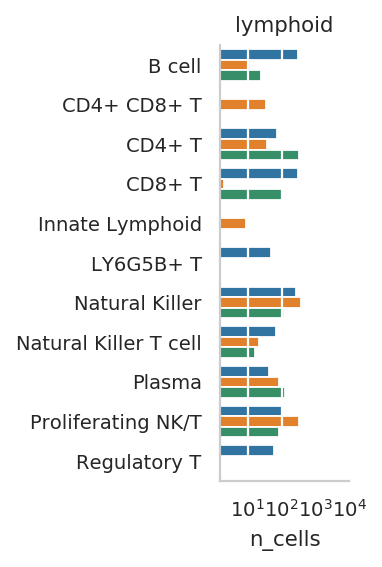

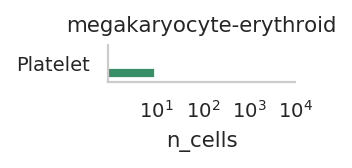

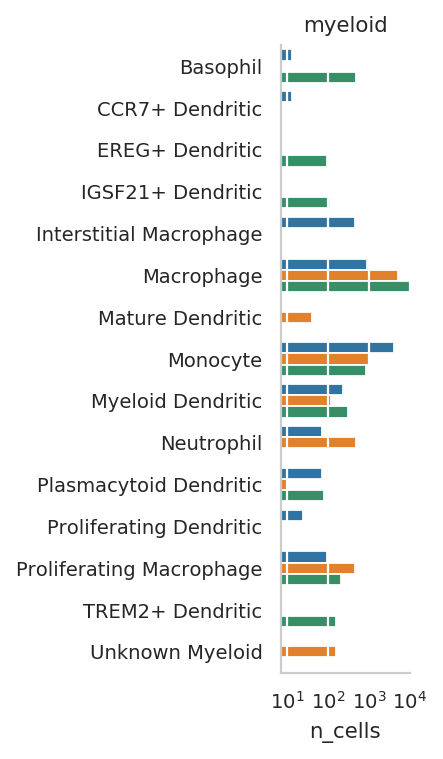

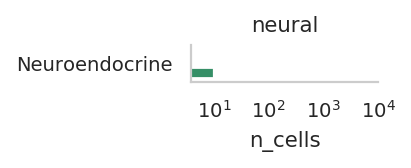

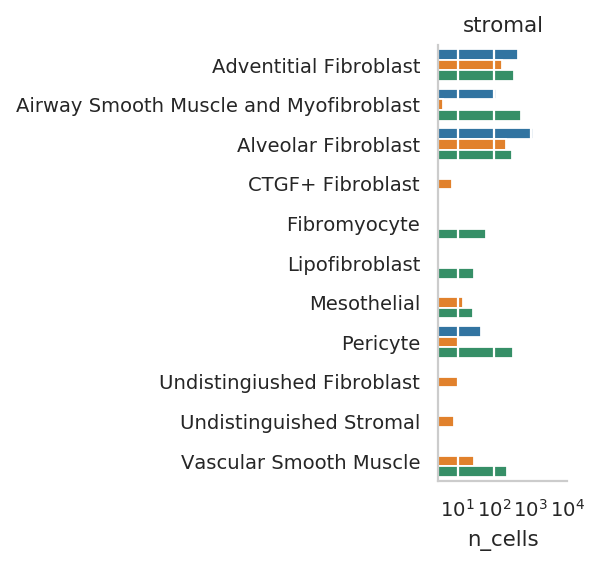

In [5]:
cross_species = xspecies.CrossSpeciesComparison(adata, 'compartment_narrow')
cross_species.plot_shared_cell_types()

## only use narrow groups that are shared across all

In [6]:
adata_same_narrow_group = adata[adata.obs.groupby('narrow_group').filter(lambda x: x.species.nunique() == 3).index]
adata_same_narrow_group

View of AnnData object with n_obs × n_vars = 43114 × 11761 
    obs: 'age', 'batch', 'cell', 'cell_barcode', 'cell_ontology_class', 'cell_ontology_id', 'channel', 'channel_no_10x', 'channel_tissue', 'compartment', 'compartment_id', 'free_annotation', 'individual', 'location', 'magnetic.selection', 'method', 'mouse.id', 'nGene', 'nUMI', 'n_barcodes', 'n_counts', 'n_genes', 'orig.ident', 'original_channel', 'patient', 'percent.ribo', 'possibly_contaminated_barcode', 'preparation.site', 'region', 'sample', 'sequencing_run', 'sex', 'species', 'species_batch', 'species_latin', 'subtissue', 'tissue', 'tissue_free_annotation', 'compartment_updated_from_human', 'compartment_updated_from_human__with_species', 'compartment_updated_from_lemur', 'compartment_updated_from_lemur__with_species', 'narrow_group', 'broad_group', 'compartment_group', 'log_counts', 'sqrt_counts', 'compartment_narrow'
    var: 'mouse_lemur__gene_name', 'mouse_lemur_to_human__homology_type', 'human_to_mouse__homology_type',

In [7]:
n_celltype_per_species = adata_same_narrow_group.obs.groupby(['compartment_narrow', 'species']).size()

for d in outdirs:
    n_celltype_per_species.to_excel(f'{d}/n_celltypes_per_species.xlsx')

In [8]:
min_cells_per_group = 20
groupby = ['compartment_narrow', 'species']
df = adata_same_narrow_group.obs.groupby(groupby).filter(lambda x: len(x) >= min_cells_per_group)
df = df.groupby('compartment_narrow').filter(lambda x: x['species'].nunique() == 3)
print(df.compartment_narrow.nunique())
df.groupby(groupby).size()

14


compartment_narrow                       species    
endothelial - Capillary                  Mouse           1244
                                         Mouse lemur       44
                                         Human            842
endothelial - Capillary Aerocyte         Mouse            476
                                         Mouse lemur      111
                                         Human           1047
endothelial - Lymphatic                  Mouse             32
                                         Mouse lemur       68
                                         Human            286
epithelial - Alveolar Epithelial Type 2  Mouse            107
                                         Mouse lemur      732
                                         Human           3427
lymphoid - CD4+ T                        Mouse             75
                                         Mouse lemur       37
                                         Human            332
lymphoid - Natura

In [9]:
adata_min_cells = adata[df.index]
adata_min_cells

View of AnnData object with n_obs × n_vars = 39053 × 11761 
    obs: 'age', 'batch', 'cell', 'cell_barcode', 'cell_ontology_class', 'cell_ontology_id', 'channel', 'channel_no_10x', 'channel_tissue', 'compartment', 'compartment_id', 'free_annotation', 'individual', 'location', 'magnetic.selection', 'method', 'mouse.id', 'nGene', 'nUMI', 'n_barcodes', 'n_counts', 'n_genes', 'orig.ident', 'original_channel', 'patient', 'percent.ribo', 'possibly_contaminated_barcode', 'preparation.site', 'region', 'sample', 'sequencing_run', 'sex', 'species', 'species_batch', 'species_latin', 'subtissue', 'tissue', 'tissue_free_annotation', 'compartment_updated_from_human', 'compartment_updated_from_human__with_species', 'compartment_updated_from_lemur', 'compartment_updated_from_lemur__with_species', 'narrow_group', 'broad_group', 'compartment_group', 'log_counts', 'sqrt_counts', 'compartment_narrow'
    var: 'mouse_lemur__gene_name', 'mouse_lemur_to_human__homology_type', 'human_to_mouse__homology_type',

## Plot number of cell types per species

Trying to set attribute `.obs` of view, copying.


(66, 4)
--- compartment: endothelial ---
--- compartment: epithelial ---
--- compartment: lymphoid ---
--- compartment: myeloid ---
--- compartment: stromal ---


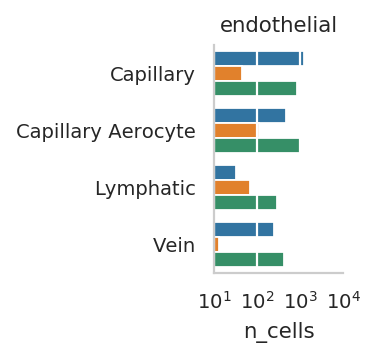

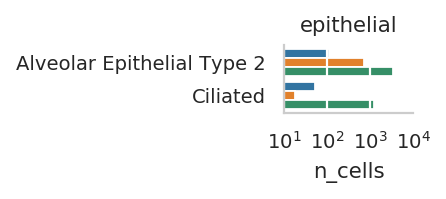

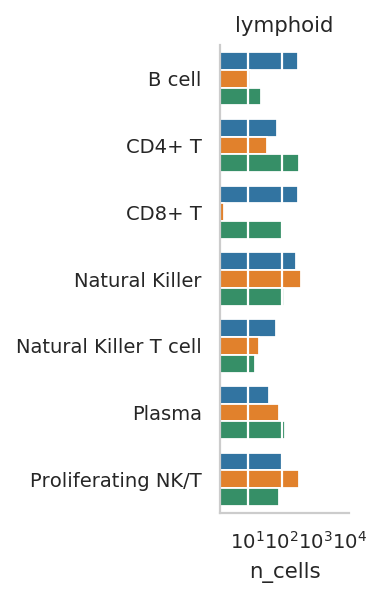

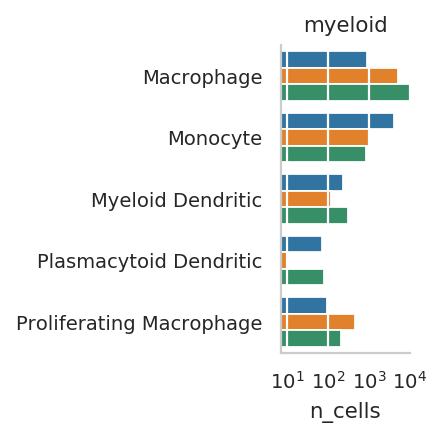

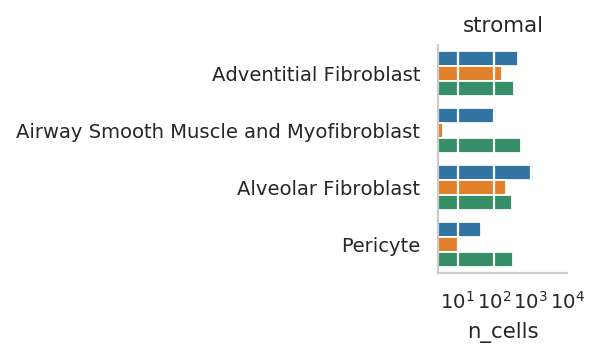

In [10]:
cross_species_shared = xspecies.CrossSpeciesComparison(adata_same_narrow_group, 'compartment_narrow')
cross_species_shared.plot_shared_cell_types(fig_height_scale=0.5)

# Get mean/median gene expression

Code copied from https://github.com/theislab/scanpy/issues/181#issuecomment-534867254

## Compartment group

In [11]:
# compartment_agg = xspecies.PerGroupAgg(adata_same_narrow_group, 'compartment_group')
# compartment_agg.do_aggregation(aggfunc='mean', plot=True)

# # compartment_agg.bootstrap_average(n_iteration=10, n_per_group=1000, plot=True, aggfunc=np.median, aggfunc_name='median')

# # compartment_agg.aggregated['median'].head()

# compartment_agg.do_aggregation(aggfunc=np.median, plot=True, aggfunc_name='median')


# # compartment_agg.do_aggregation(aggfunc='mean', plot=True)


# # compartment_agg.bootstrap_average(n_iteration=10, n_per_group=100, plot=True, aggfunc=np.median, aggfunc_name='median')

# compartment_agg.tidy_nonzero.keys()

# # compartment_agg.tidy_nonzero['bootstrap_median__10iter__100pergroup']

# # %time compartment_agg.bootstrap_means(n_iteration=100, n_per_group=1000, plot=True)

# compartment_agg.do_aggregation(aggfunc=np.percentile, plot=True, q=0.1, aggfunc_name='percentile_10%')

# compartment_agg.do_aggregation(aggfunc=np.median, plot=True, aggfunc_name='median')

# compartment_agg.do_aggregation(aggfunc=np.percentile, plot=True, q=0.2, aggfunc_name='percentile_20%')

# compartment_agg.aggregated['mean']

## Narrow group

Spearman correlation of sizes vs nonzero: 0.905
Pearson correlation of sizes vs nonzero: 0.615


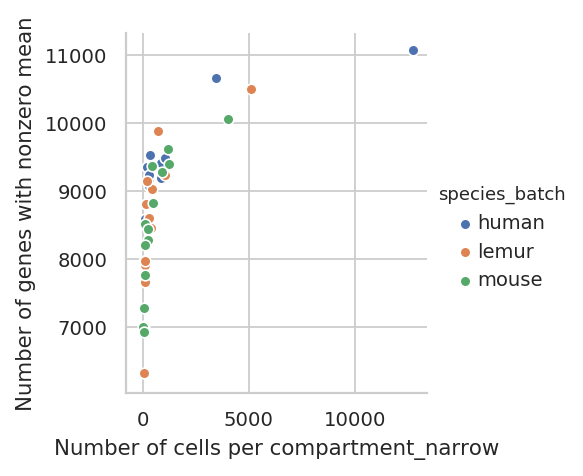

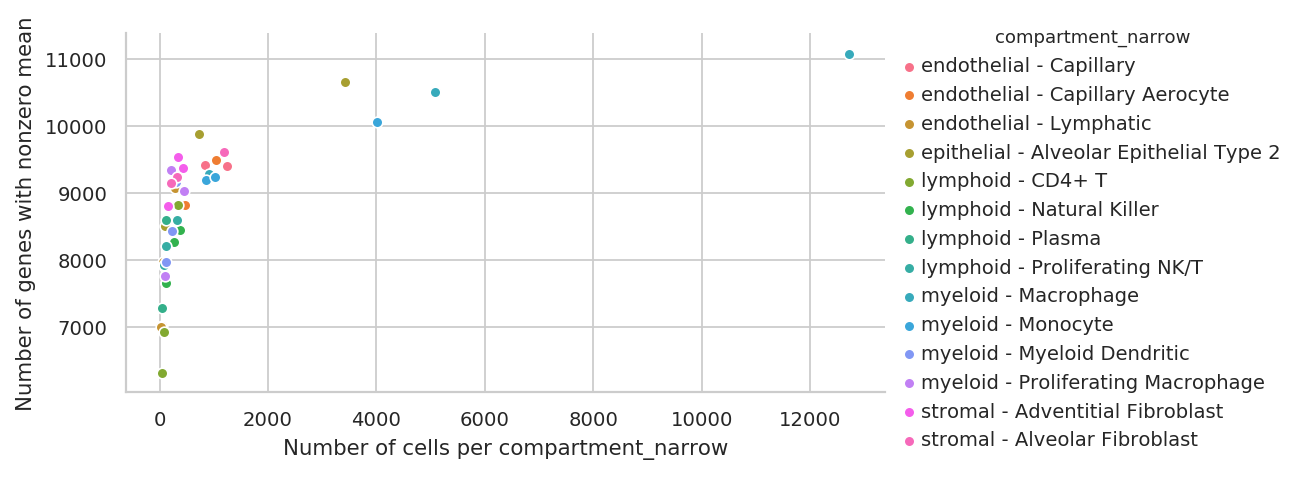

In [12]:
narrow_agg_mean = xspecies.PerGroupAgg(adata_min_cells, group='compartment_narrow')
narrow_agg_mean.do_aggregation(aggfunc='mean', plot=True)

Spearman correlation of sizes vs nonzero: 0.164
Pearson correlation of sizes vs nonzero: 0.341


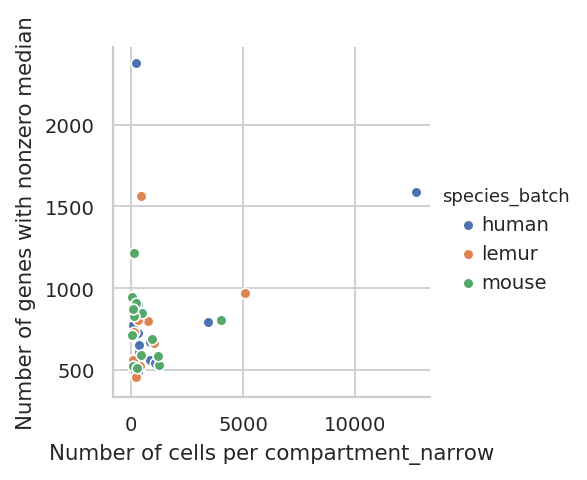

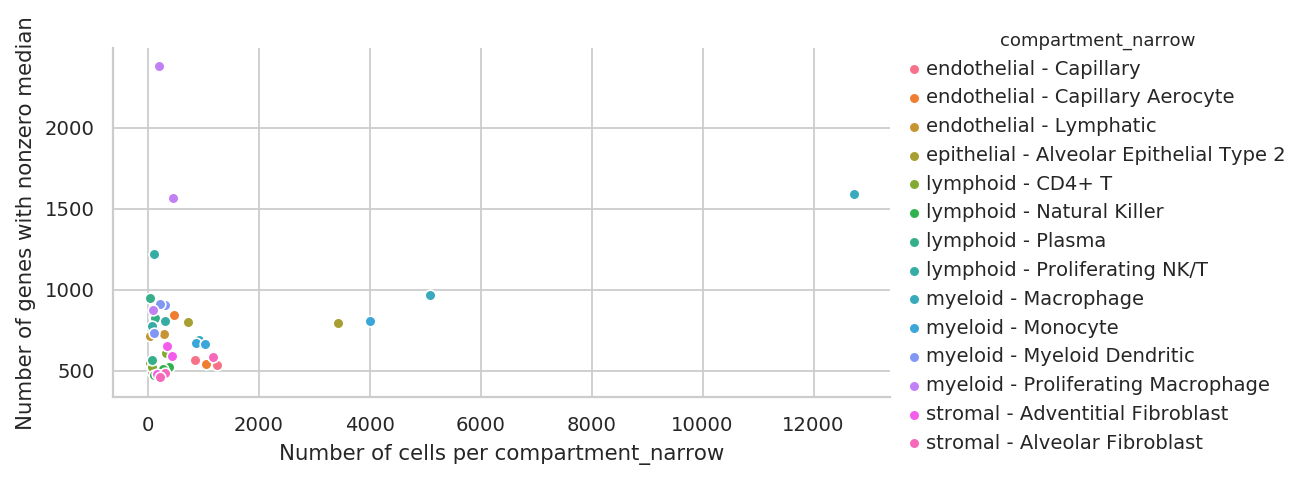

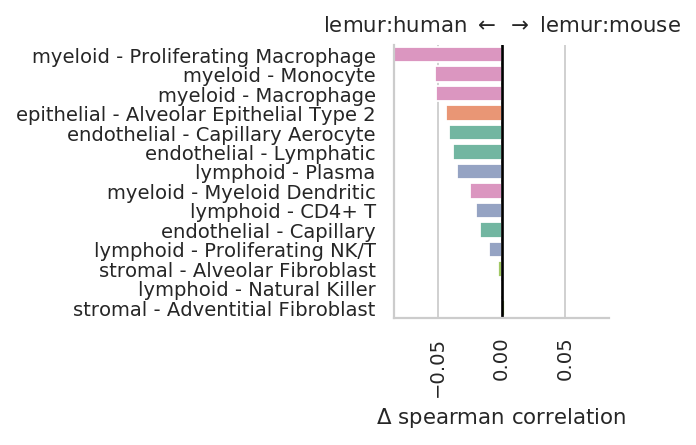

In [13]:
narrow_agg_median = xspecies.PerGroupAgg(adata_min_cells, group='compartment_narrow')
narrow_agg_median.do_aggregation(aggfunc=np.median, plot=True, aggfunc_name='median')

# Correlate medians as means

narrow_agg_median.do_correlation(method='spearman')

narrow_agg_median.do_correlation_difference('lemur')

# sorted(adata_same_narrow_group.obs.compartment_group.unique())

sns.set(context='paper', style='whitegrid')
narrow_agg_median.correlation_difference_plot()

In [14]:
narrow_agg_median.correlation_difference.head()

corr(lemur, mouse) - corr(lemur, human)  endothelial - Capillary  \
endothelial - Capillary                                -0.017075   
endothelial - Capillary Aerocyte                       -0.002557   
endothelial - Lymphatic                                -0.022527   
epithelial - Alveolar Epithelial Type 2                -0.026470   
lymphoid - CD4+ T                                      -0.031742   

corr(lemur, mouse) - corr(lemur, human)  endothelial - Capillary Aerocyte  \
endothelial - Capillary                                         -0.064922   
endothelial - Capillary Aerocyte                                -0.040987   
endothelial - Lymphatic                                         -0.060612   
epithelial - Alveolar Epithelial Type 2                          0.005900   
lymphoid - CD4+ T                                               -0.020021   

corr(lemur, mouse) - corr(lemur, human)  endothelial - Lymphatic  \
endothelial - Capillary                                -0.001135   
endothelial - Capillary Aerocyte                        0.004503   
endothelial - Lymphatic                                -0.038124   
epithelial - Alveolar Epithelial Type 2                -0.039039   
lymphoid - CD4+ T                                      -0.056494   

corr(lemur, mouse) - corr(lemur, human)  epithelial - Alveolar Epithelial Type 2  \
endothelial - Capillary                                                -0.030872   
endothelial - Capillary Aerocyte                                       -0.037226   
endothelial - Lymphatic                                                -0.046042   
epithelial - Alveolar Epithelial Type 2                                -0.043473   
lymphoid - CD4+ T                                                      -0.039049   

corr(lemur, mouse) - corr(lemur, human)  lymphoid - CD4+ T  \
endothelial - Capillary                          -0.015108   
endothelial - Capillary Aerocyte                  0.004866   
endothelial - Lymphatic                          -0.024141   
epithelial - Alveolar Epithelial Type 2          -0.027028   
lymphoid - CD4+ T                                -0.020166   

corr(lemur, mouse) - corr(lemur, human)  lymphoid - Natural Killer  \
endothelial - Capillary                                  -0.006670   
endothelial - Capillary Aerocyte                          0.007839   
endothelial - Lymphatic                                   0.011611   
epithelial - Alveolar Epithelial Type 2                   0.034391   
lymphoid - CD4+ T                                         0.026025   

corr(lemur, mouse) - corr(lemur, human)  lymphoid - Plasma  \
endothelial - Capillary                          -0.009984   
endothelial - Capillary Aerocyte                 -0.009364   
endothelial - Lymphatic                          -0.014430   
epithelial - Alveolar Epithelial Type 2          -0.009678   
lymphoid - CD4+ T                                 0.007445   

corr(lemur, mouse) - corr(lemur, human)  lymphoid - Proliferating NK/T  \
endothelial - Capillary                                      -0.053249   
endothelial - Capillary Aerocyte                             -0.054583   
endothelial - Lymphatic                                      -0.060197   
epithelial - Alveolar Epithelial Type 2                      -0.023515   
lymphoid - CD4+ T                                            -0.032343   

corr(lemur, mouse) - corr(lemur, human)  myeloid - Macrophage  \
endothelial - Capillary                              0.041150   
endothelial - Capillary Aerocyte                     0.047885   
endothelial - Lymphatic                              0.058985   
epithelial - Alveolar Epithelial Type 2             -0.035806   
lymphoid - CD4+ T                                   -0.000778   

corr(lemur, mouse) - corr(lemur, human)  myeloid - Monocyte  \
endothelial - Capillary                           -0.056655   
endothelial - Capillary Aerocyte                  -0.046293   
endothelial - Lymphati

In [15]:
narrow_agg_median.correlation_difference_tidy.head()

compartment_narrow  \
165       myeloid - Proliferating Macrophage   
135                       myeloid - Monocyte   
120                     myeloid - Macrophage   
45   epithelial - Alveolar Epithelial Type 2   
15          endothelial - Capillary Aerocyte   

     corr(lemur, mouse) - corr(lemur, human)  
165                                -0.084218  
135                                -0.052340  
120                                -0.051261  
45                                 -0.043473  
15                                 -0.040987


# Try  multiple correlation methods

## Means

(84, 4)


compartment_narrow  correlation   method  \
15          endothelial - Capillary Aerocyte    -0.261517  pearson   
30                   endothelial - Lymphatic    -0.025293  pearson   
45   epithelial - Alveolar Epithelial Type 2    -0.000234  pearson   
135                       myeloid - Monocyte     0.007719  pearson   
180         stromal - Adventitial Fibroblast     0.017112  pearson   

    anchor_species   agg  
15           lemur  mean  
30           lemur  mean  
45           lemur  mean  
135          lemur  mean  
180          lemur  mean

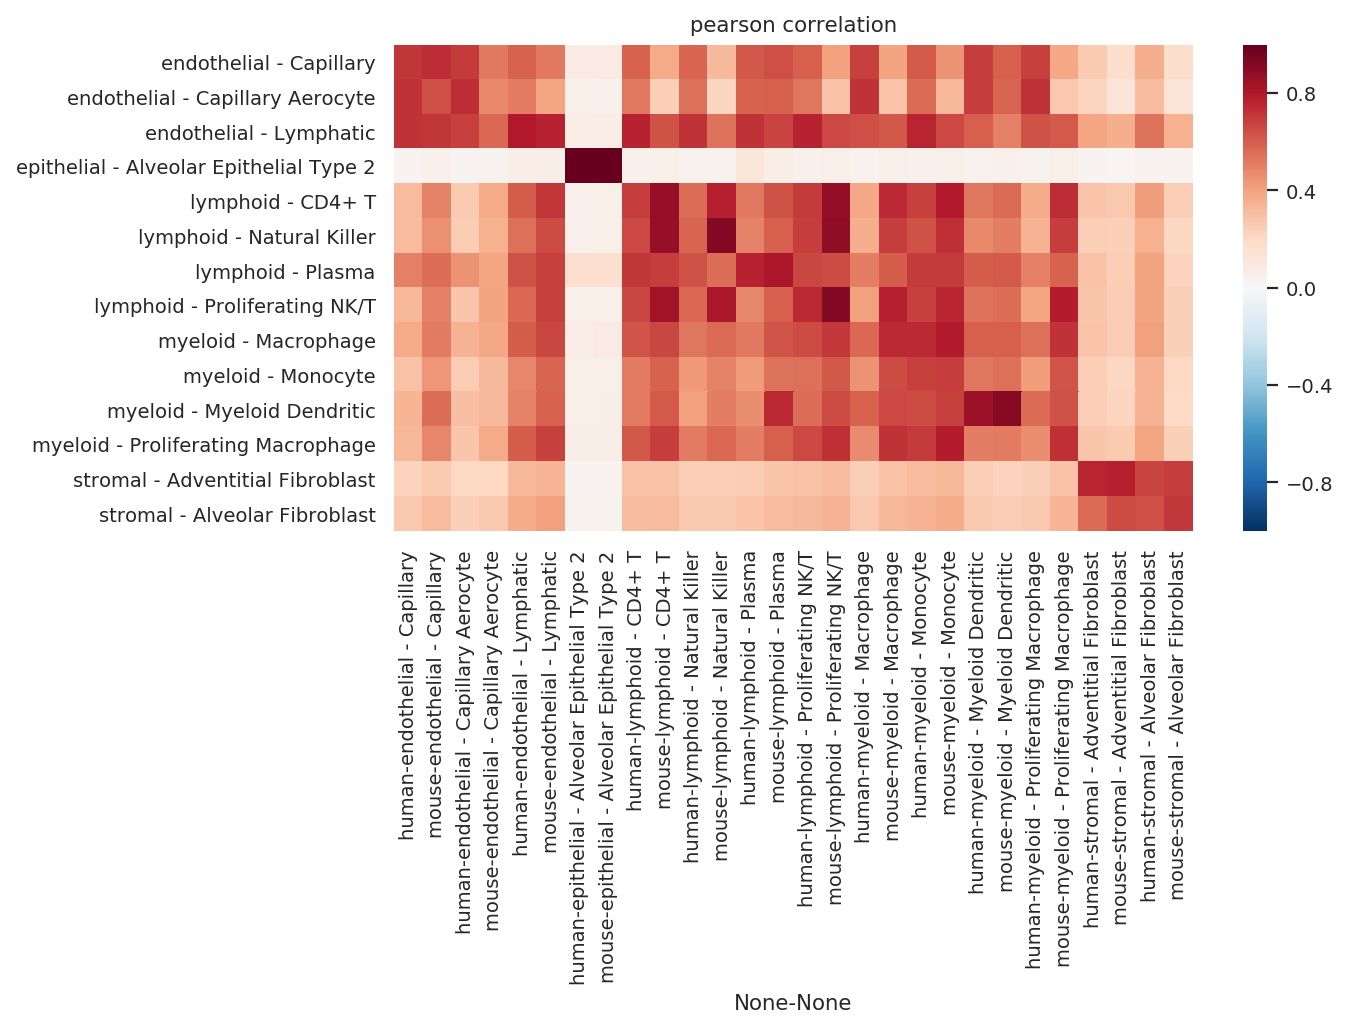

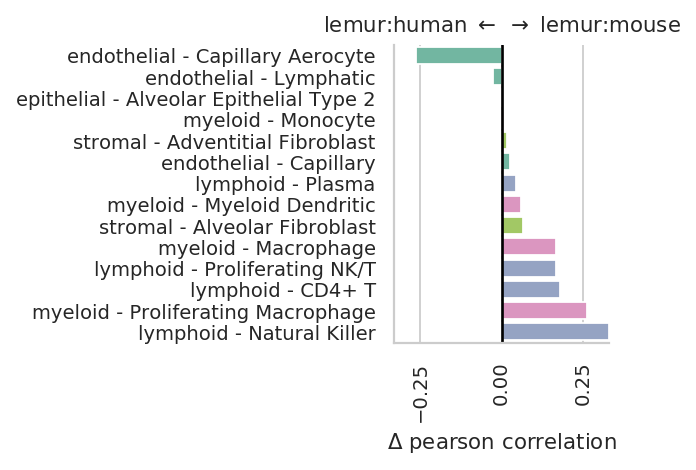

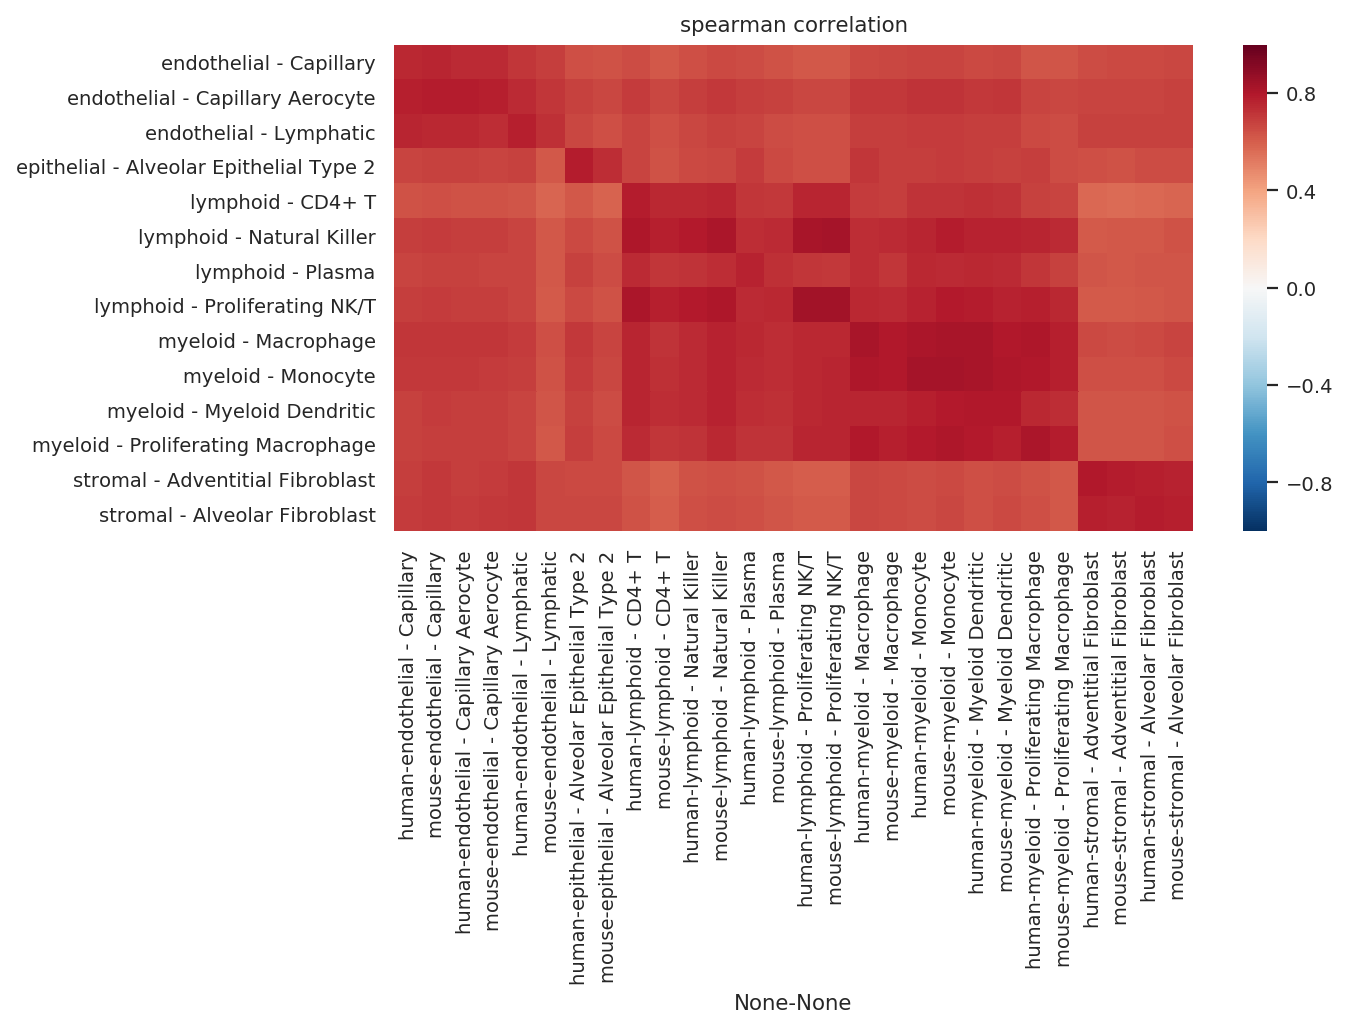

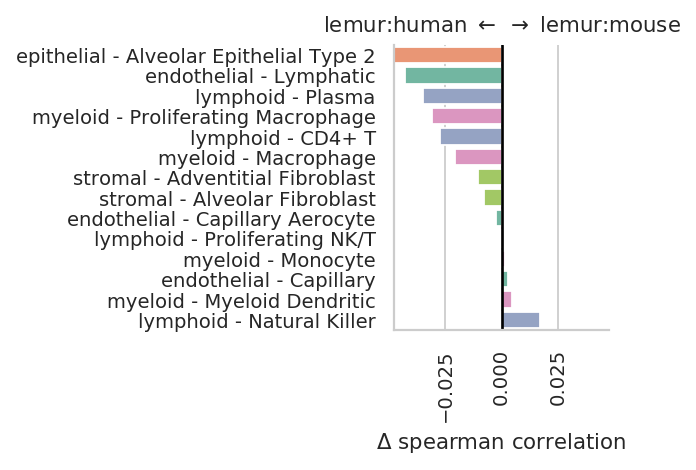

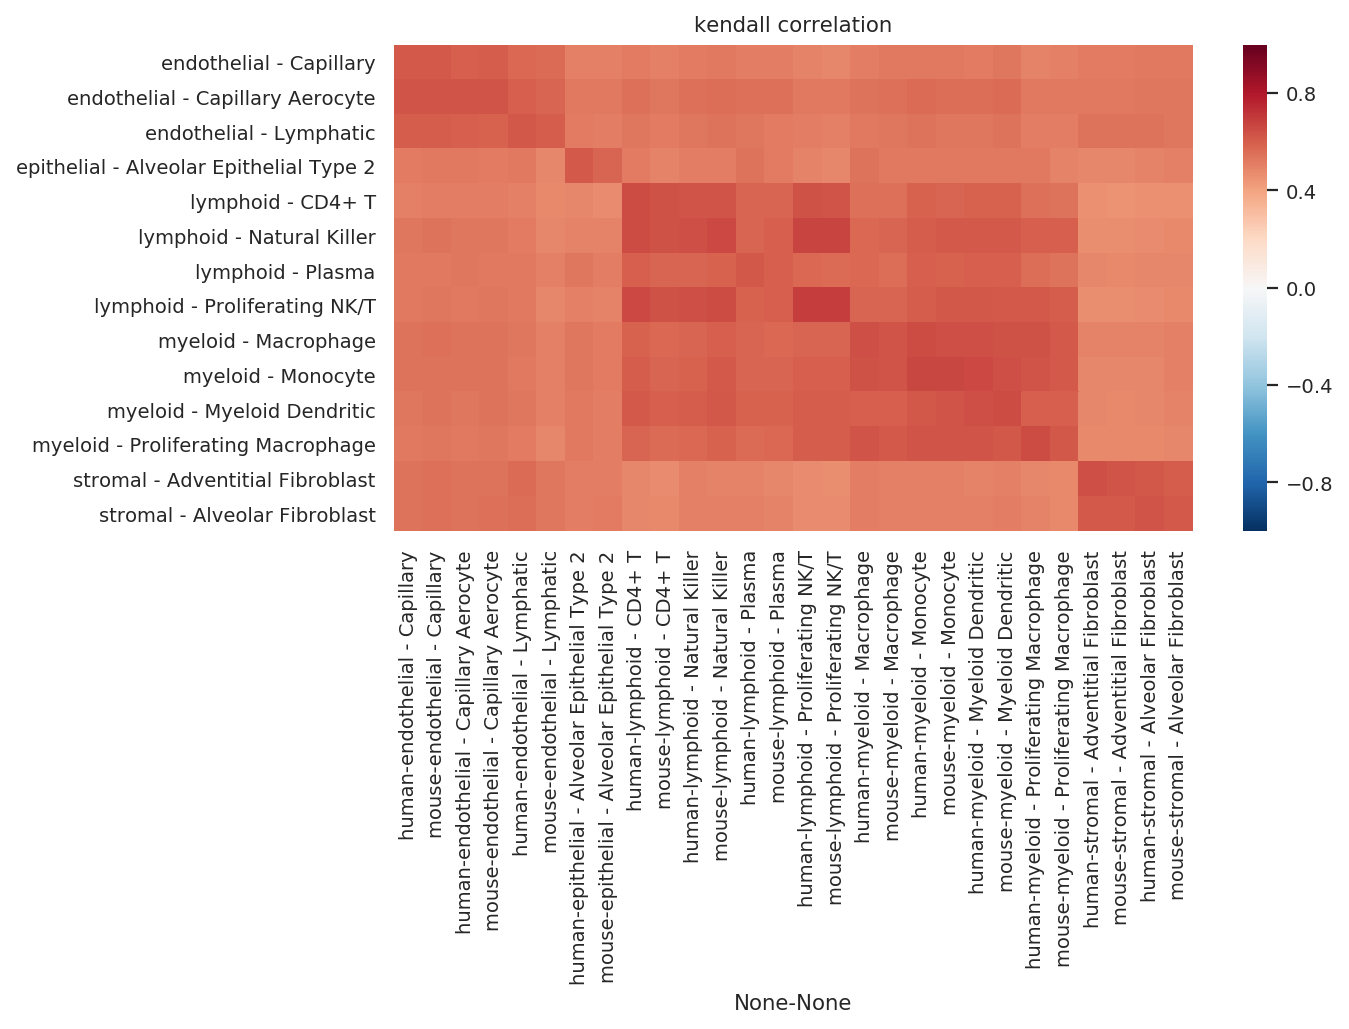

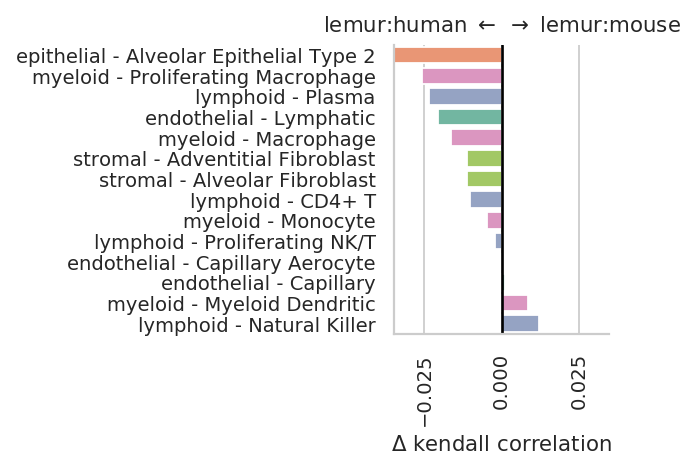

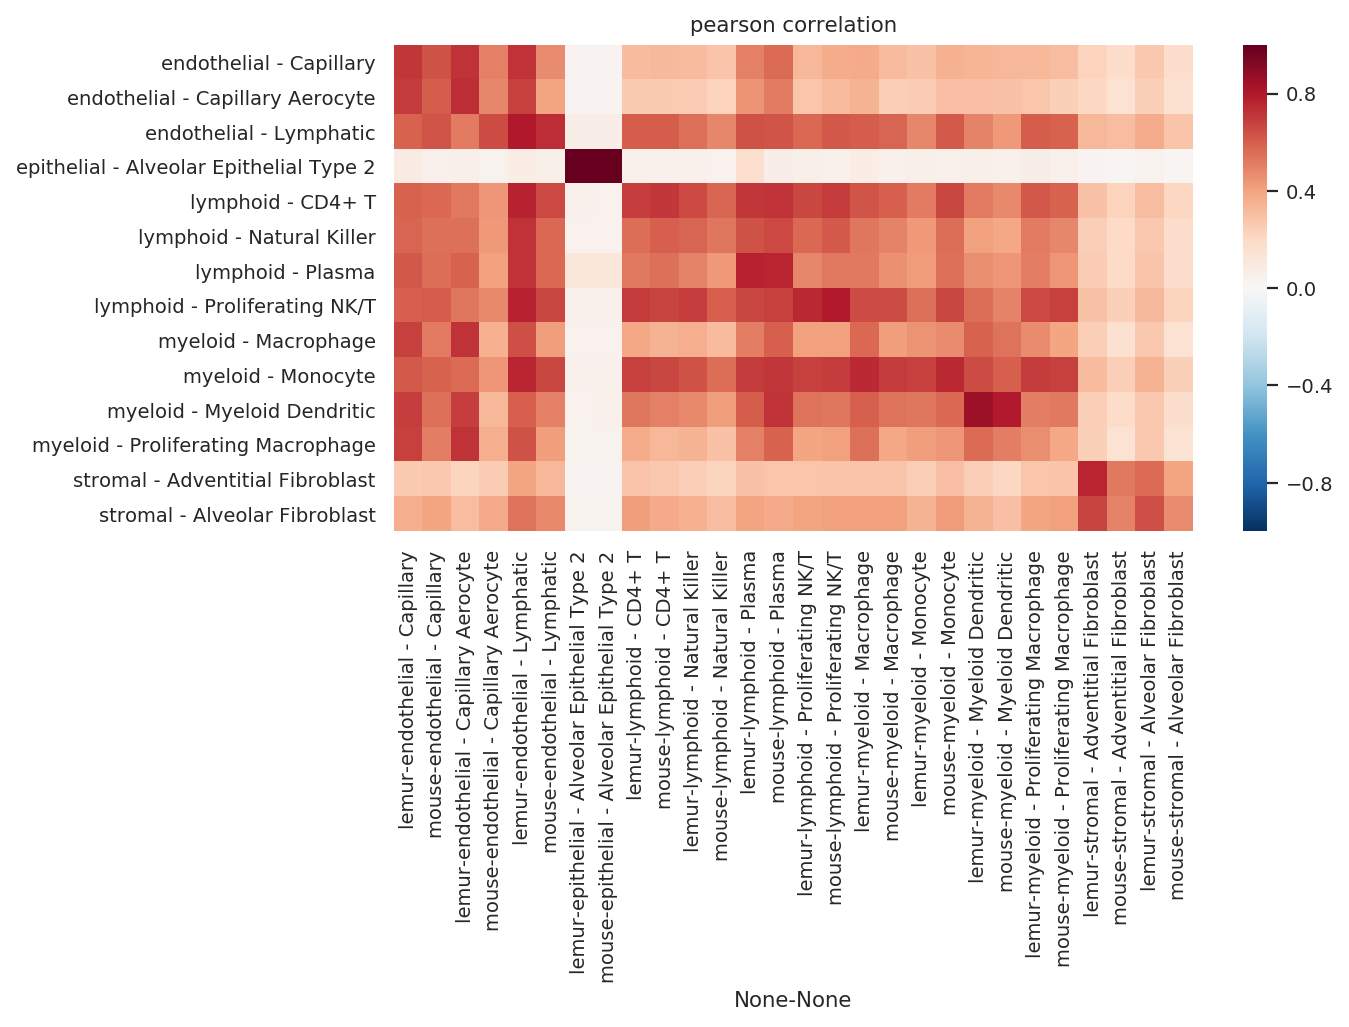

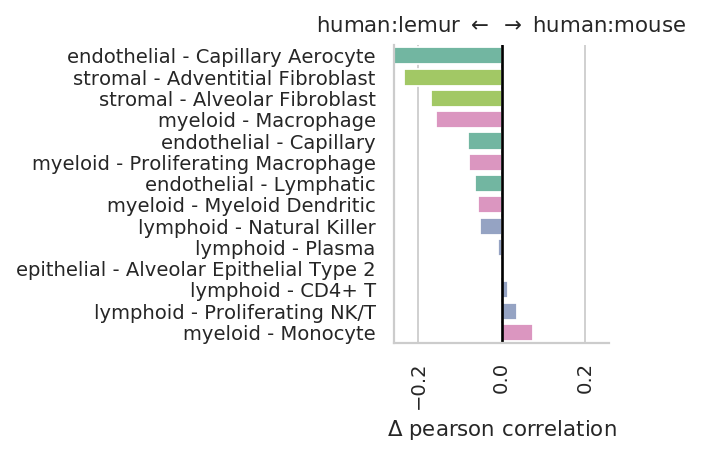

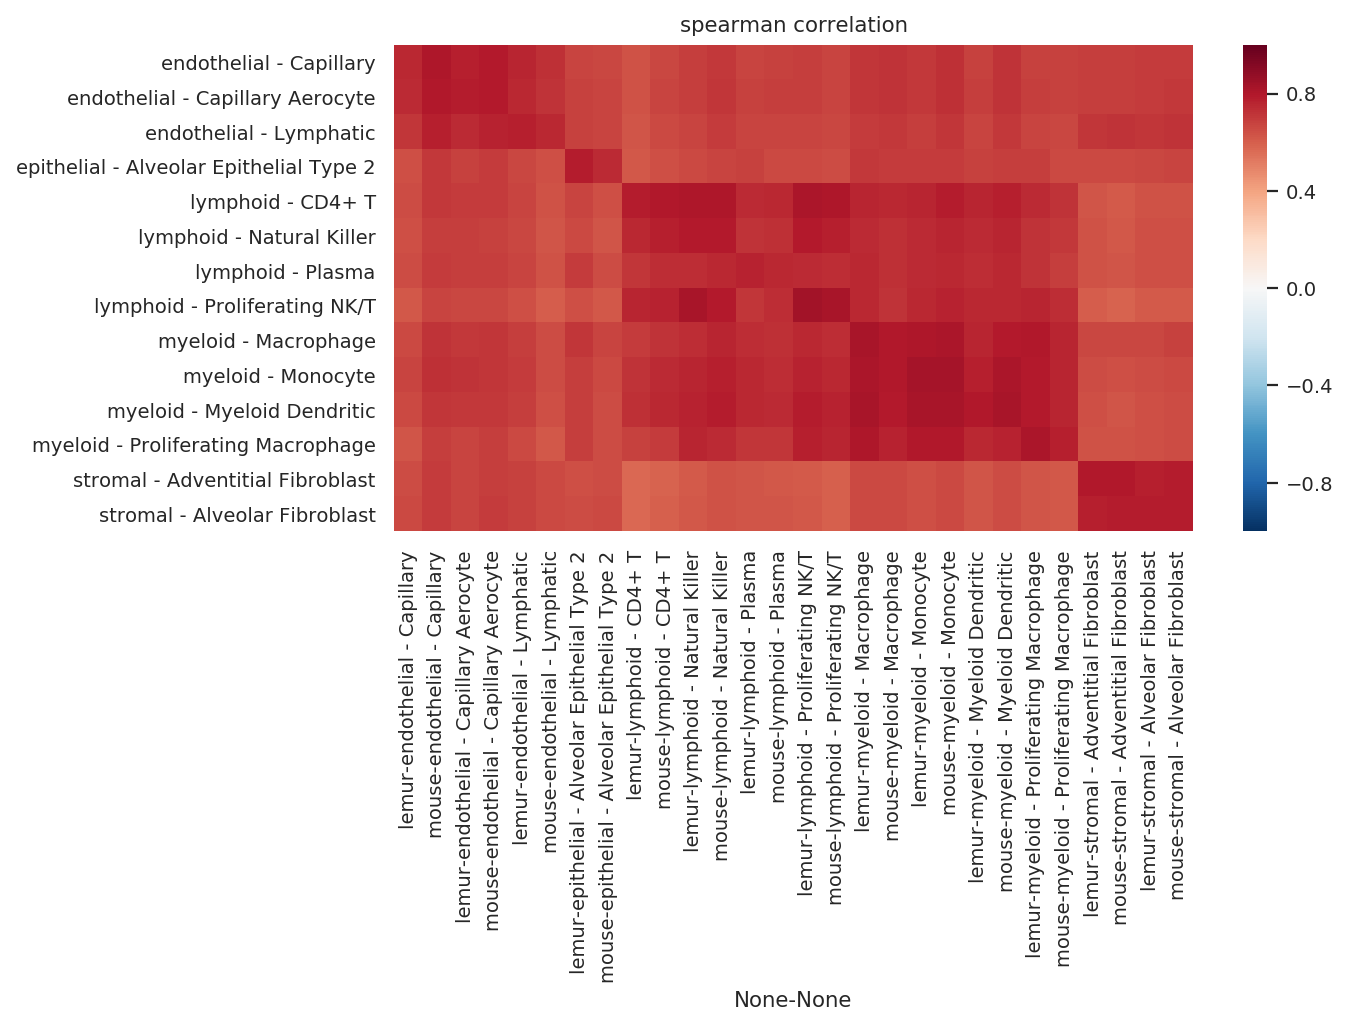

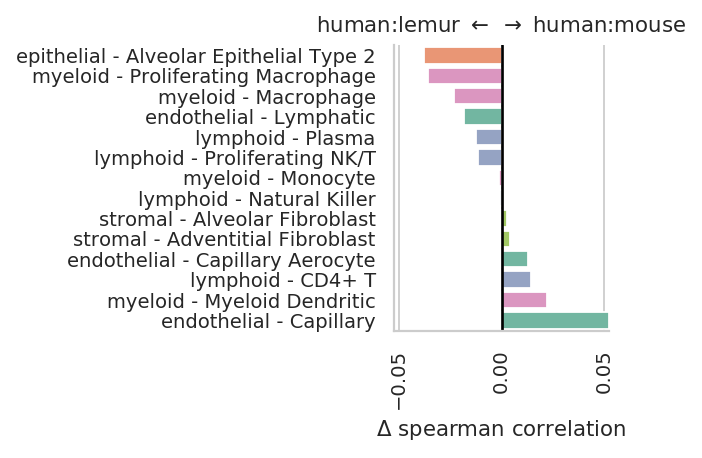

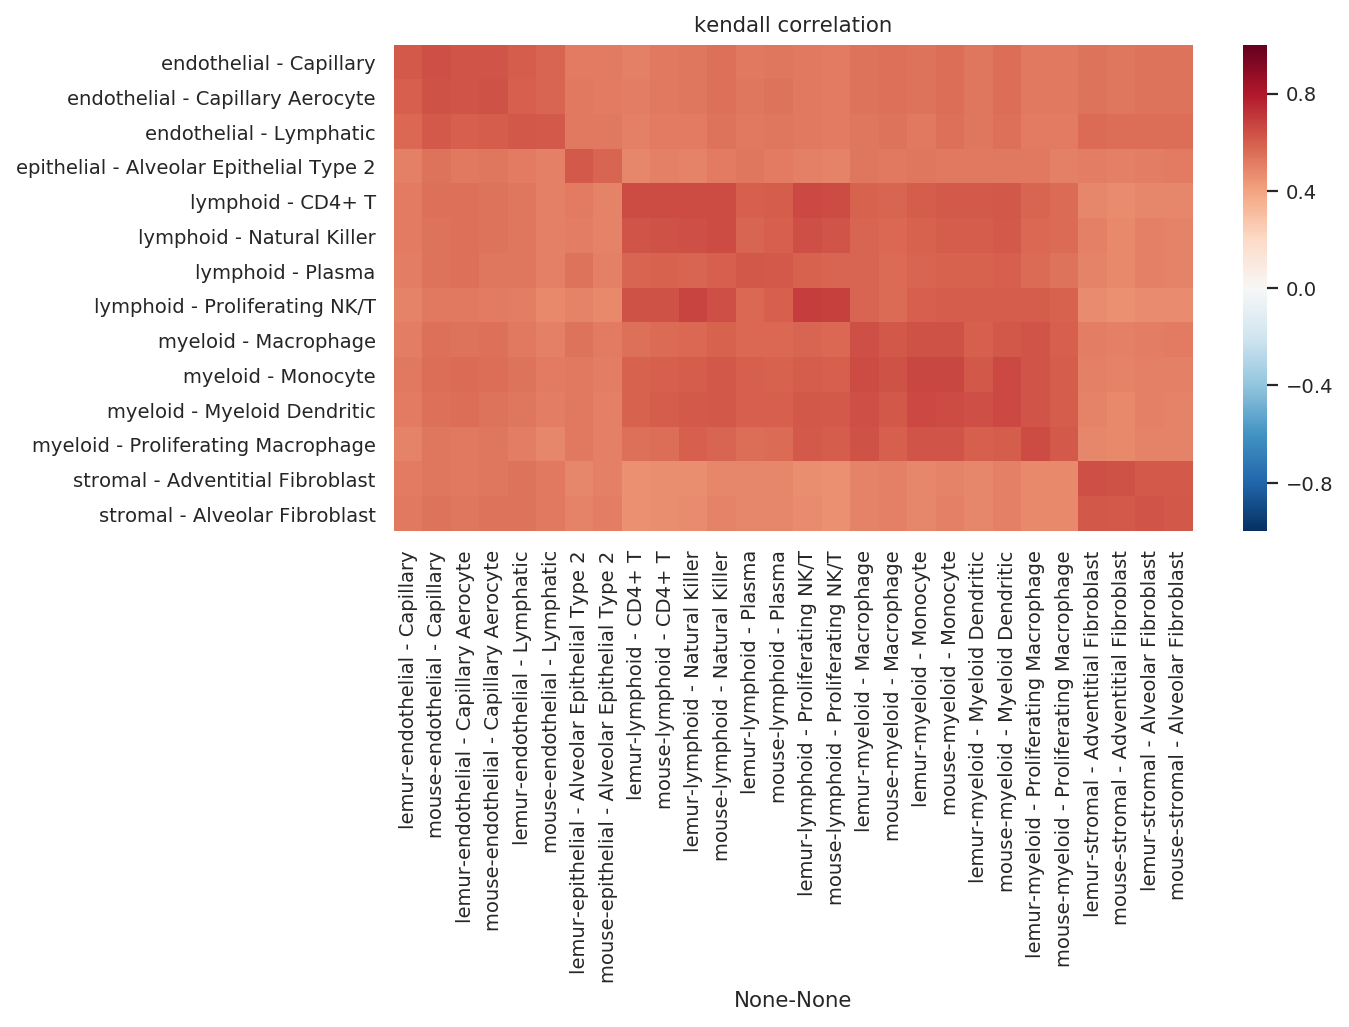

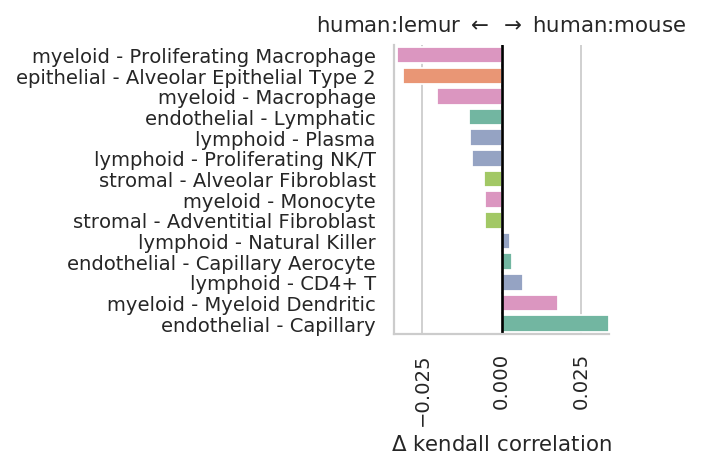

In [16]:
correlation_methods = 'pearson', 'spearman', 'kendall'

anchor_speciess = 'lemur', 'human'

dfs = []

for anchor_species in anchor_speciess:
    for method in correlation_methods:
        narrow_agg_mean.do_correlation(method=method)

        narrow_agg_mean.do_correlation_difference(anchor_species)

        # sorted(adata_same_narrow_group.obs.compartment_group.unique())

        sns.set(context='paper', style='whitegrid')
        narrow_agg_mean.correlation_heatmap()

        narrow_agg_mean.correlation_difference_plot()
        
        df = narrow_agg_mean.correlation_difference_tidy.copy()
        df = df.rename(columns={narrow_agg_mean.correlation_difference.columns.name: 'correlation'})
        df['method'] = method
        df['anchor_species'] = anchor_species
        dfs.append(df)
mean_df = pd.concat(dfs)
print(mean_df.shape)
mean_df['agg'] = 'mean'
mean_df.head()

## Medians

(84, 5)


compartment_narrow  correlation   method  \
15          endothelial - Capillary Aerocyte    -0.286930  pearson   
30                   endothelial - Lymphatic    -0.081252  pearson   
180         stromal - Adventitial Fibroblast    -0.058720  pearson   
45   epithelial - Alveolar Epithelial Type 2    -0.000648  pearson   
135                       myeloid - Monocyte     0.001582  pearson   

    anchor_species     agg  
15           lemur  median  
30           lemur  median  
180          lemur  median  
45           lemur  median  
135          lemur  median

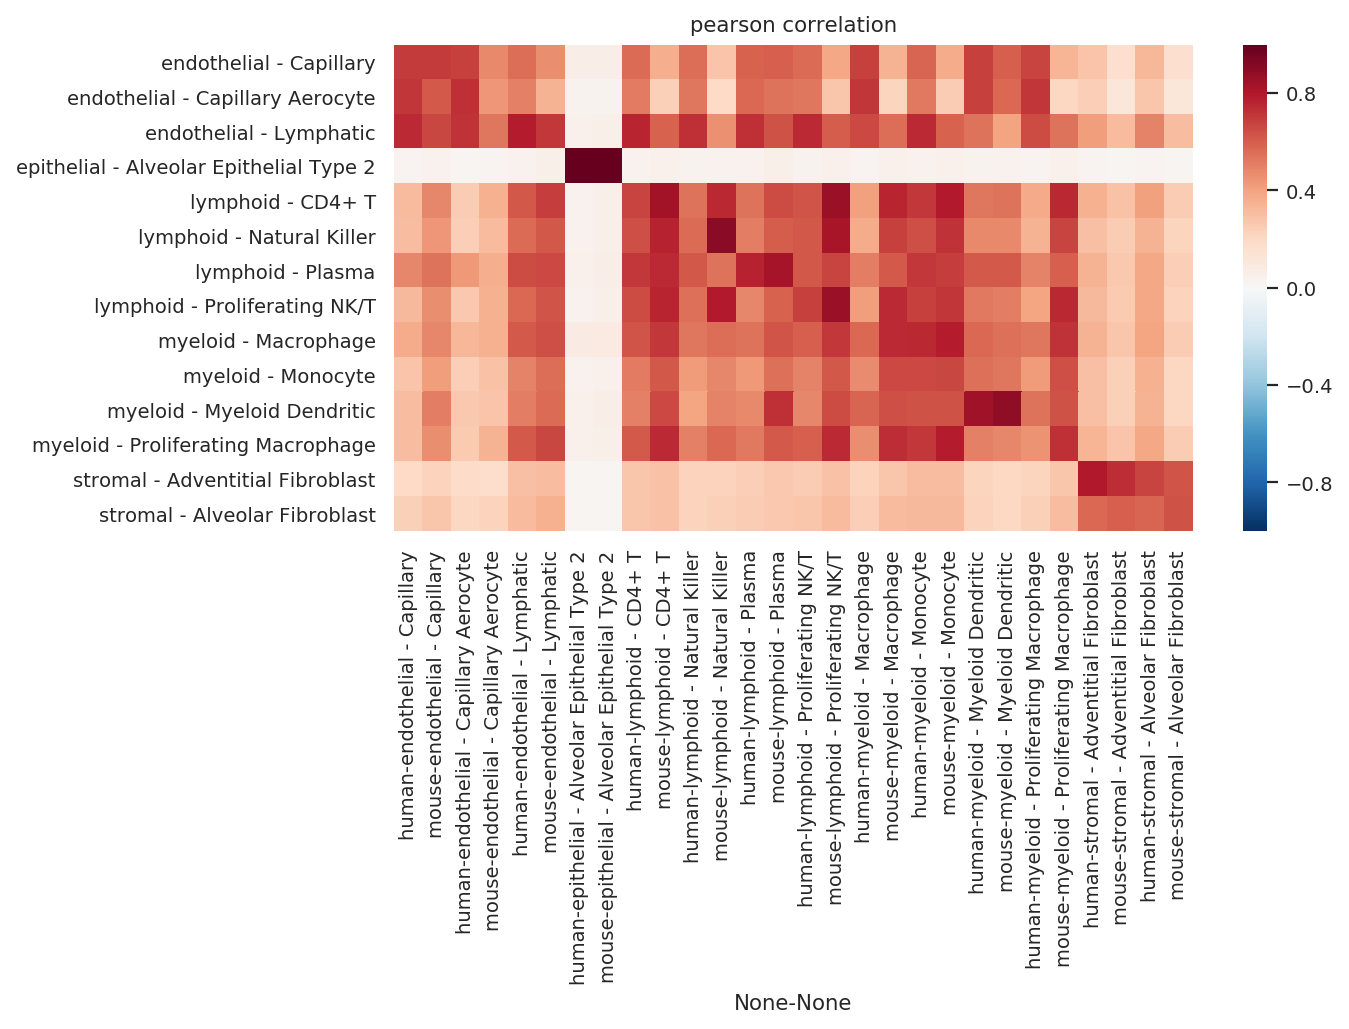

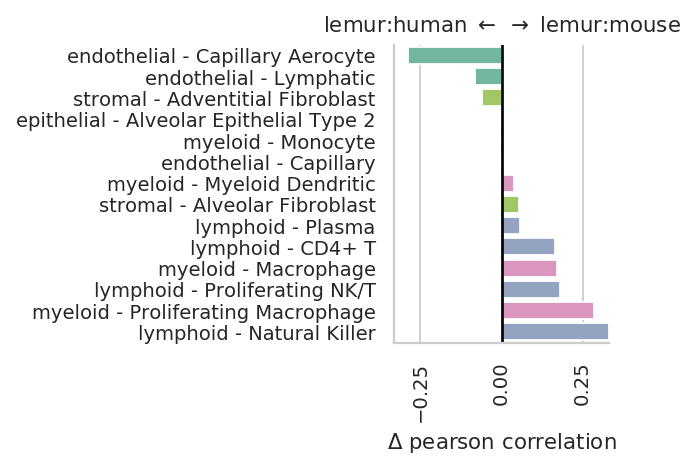

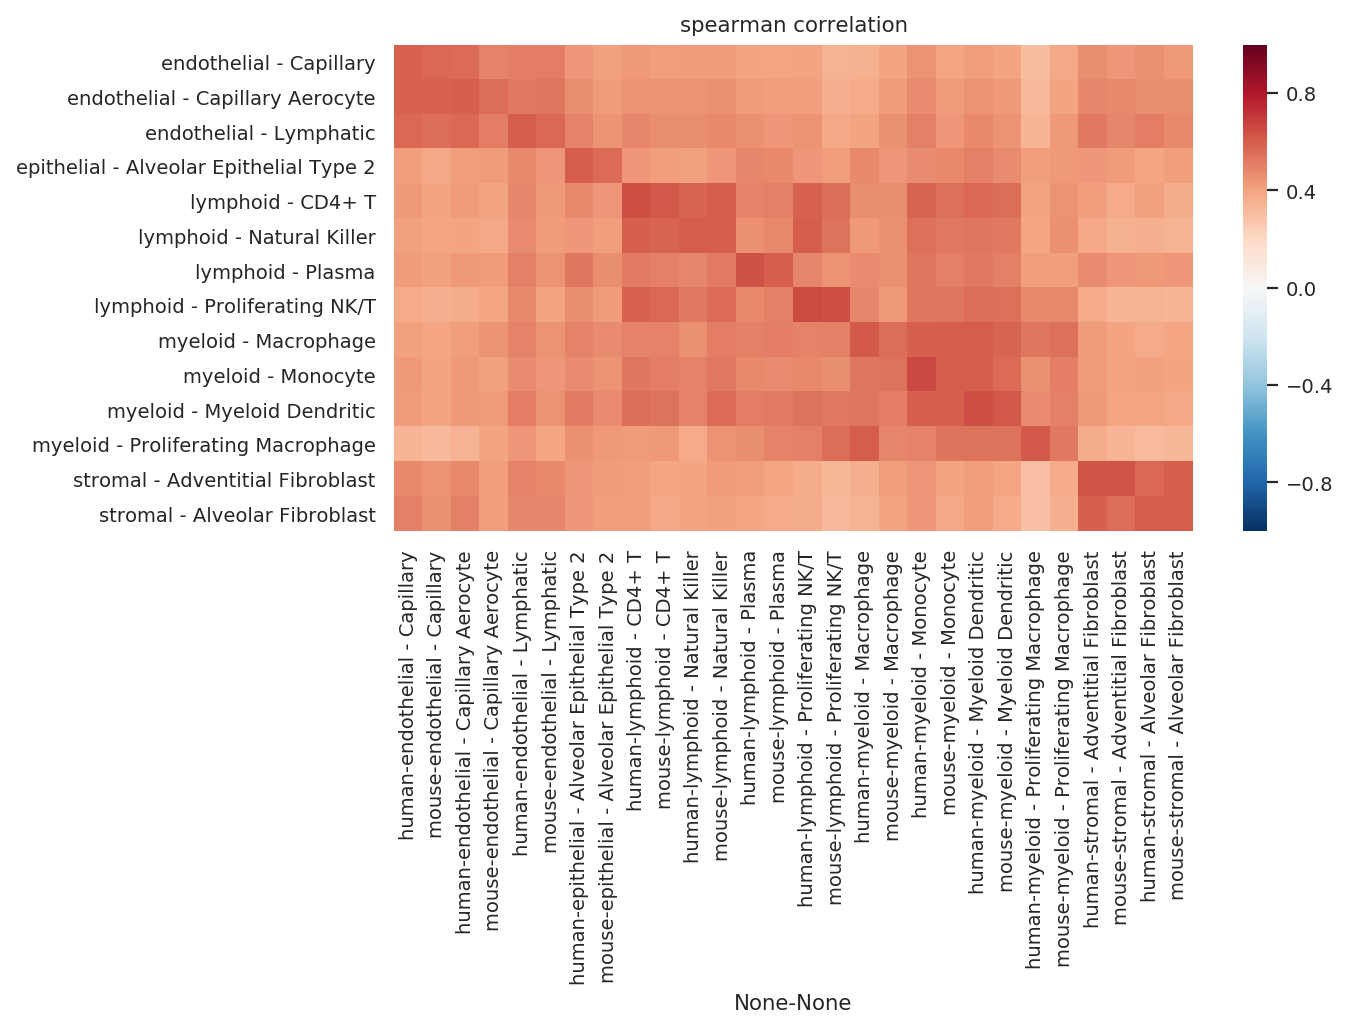

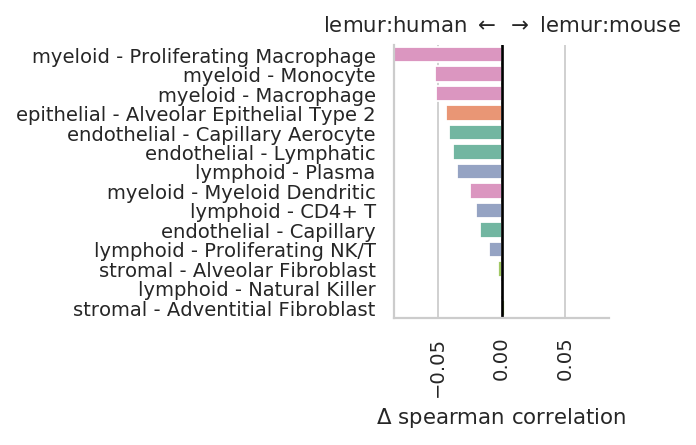

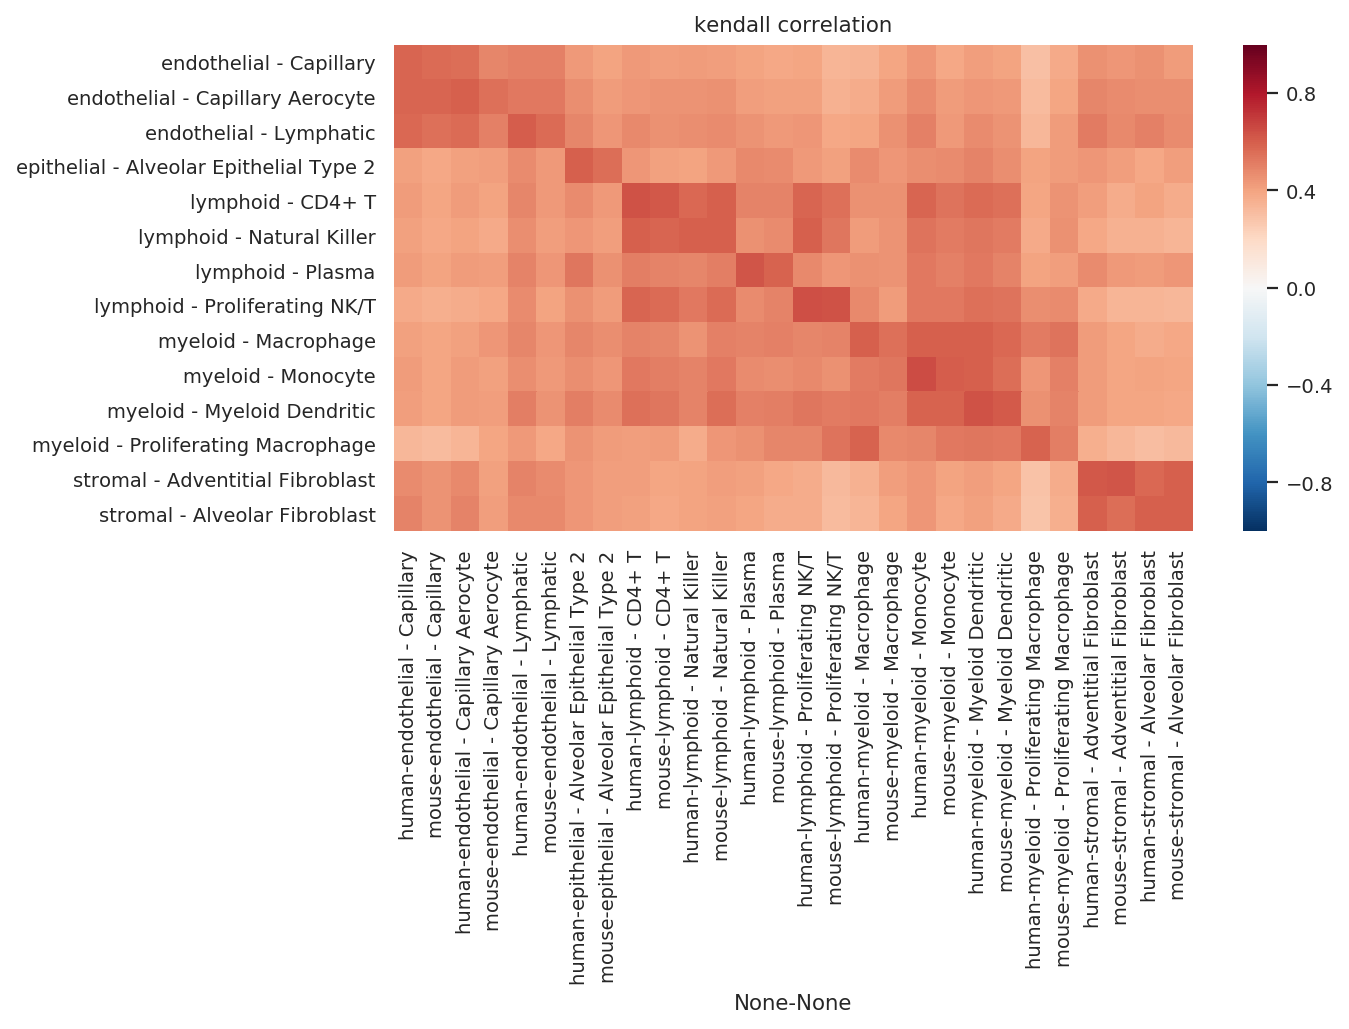

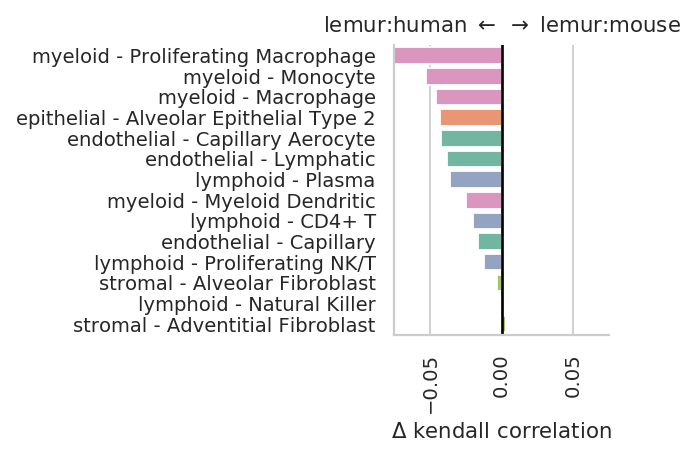

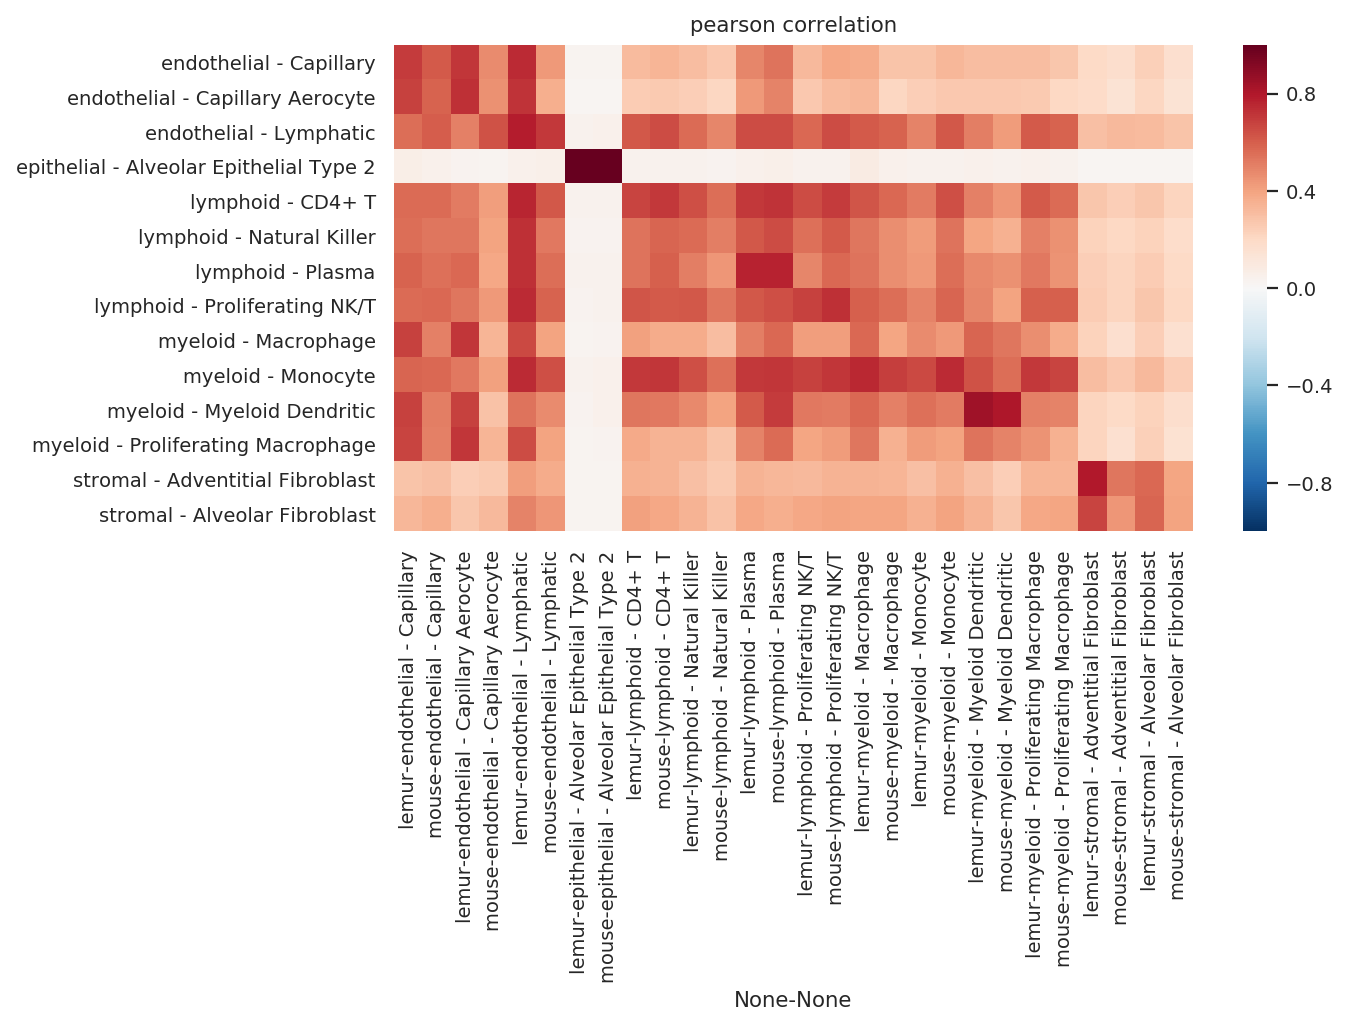

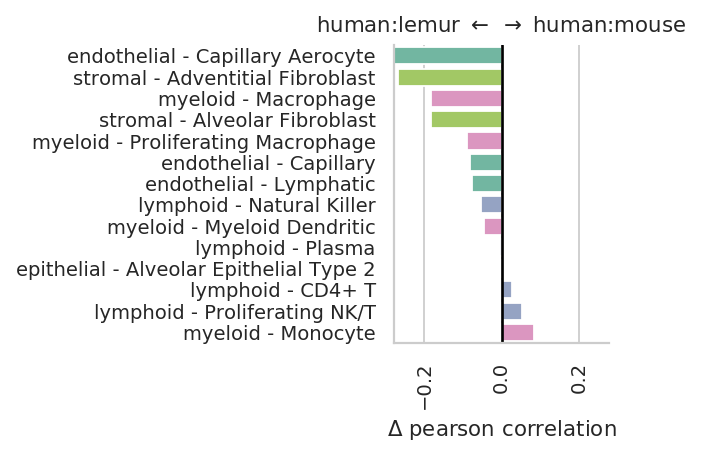

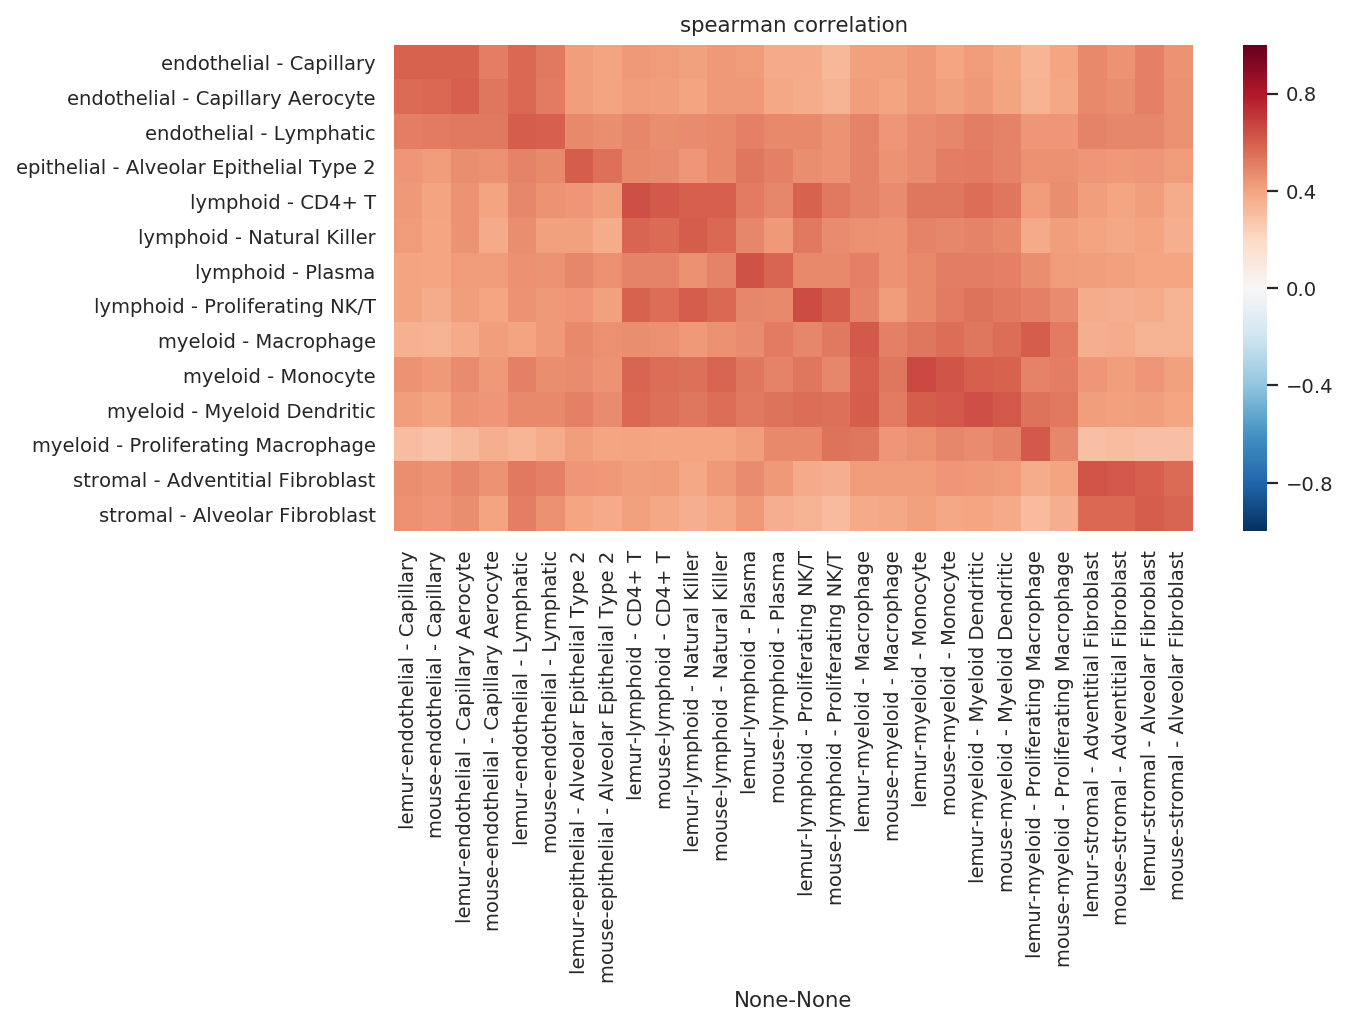

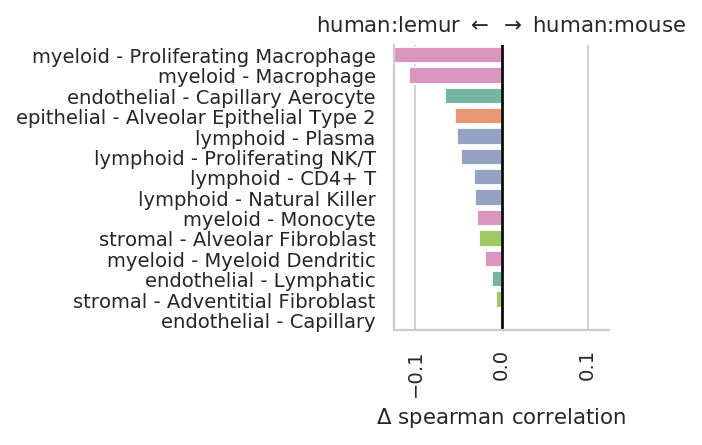

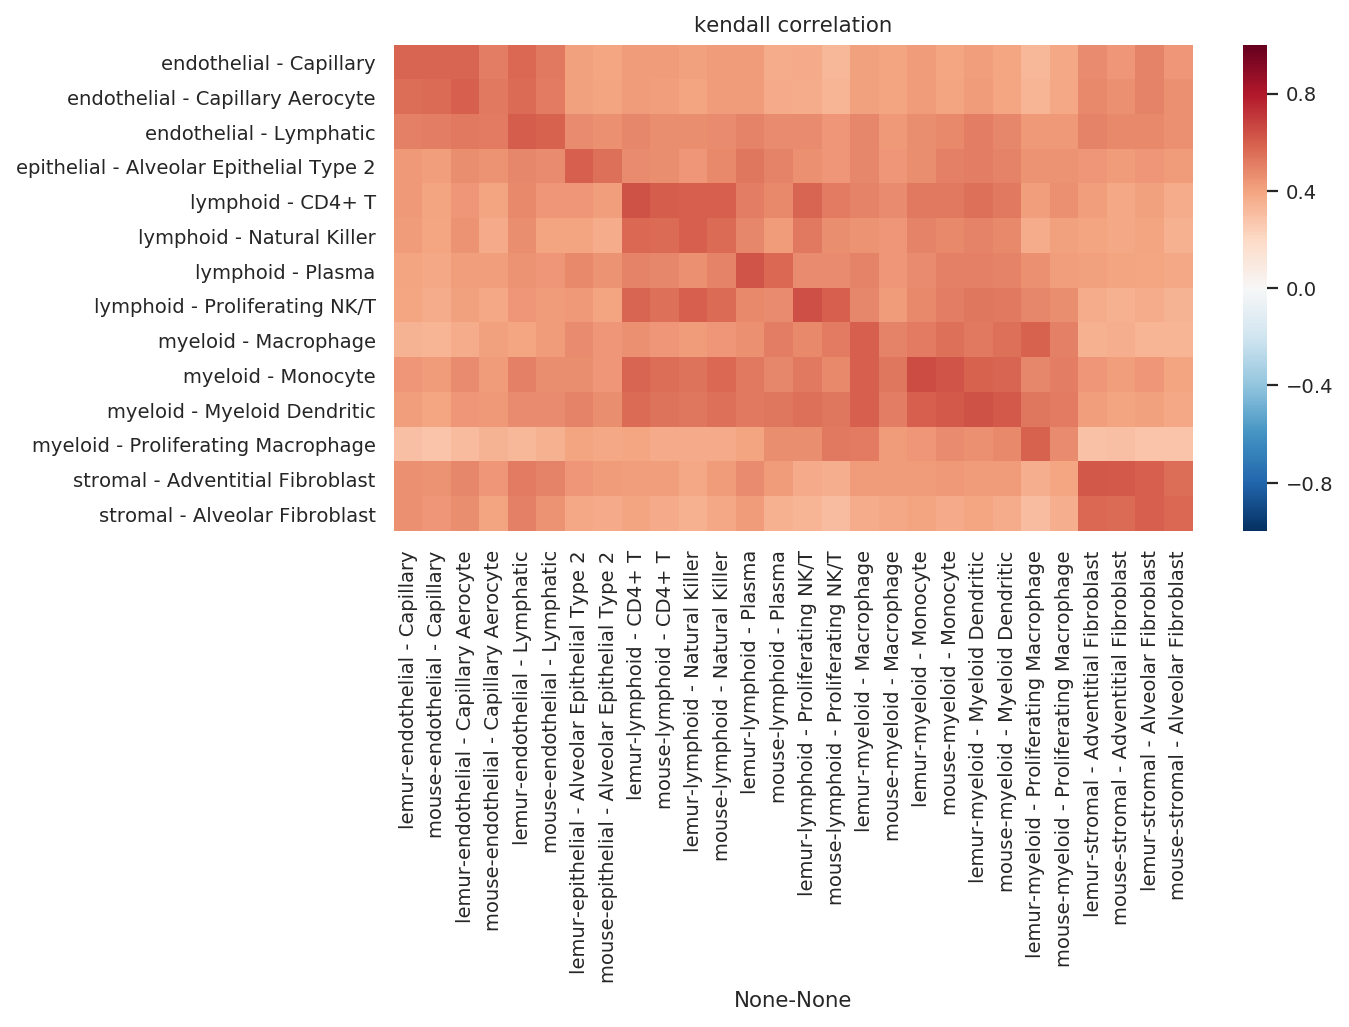

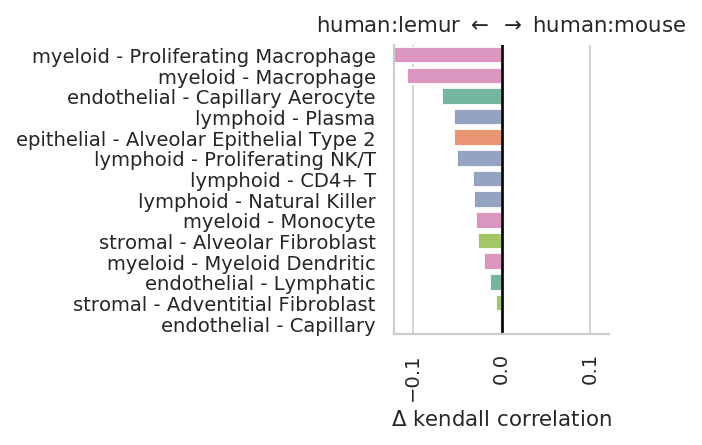

In [17]:
correlation_methods = 'pearson', 'spearman', 'kendall'

anchor_speciess = 'lemur', 'human'

dfs = []

sns.set(context='paper', style='whitegrid')

for anchor_species in anchor_speciess:
    for method in correlation_methods:
        narrow_agg_median.do_correlation(method=method)

        narrow_agg_median.do_correlation_difference(anchor_species)

        # sorted(adata_same_narrow_group.obs.compartment_group.unique())
        narrow_agg_median.correlation_heatmap()
        narrow_agg_median.correlation_difference_plot()
        
        df = narrow_agg_median.correlation_difference_tidy.copy()
        df = df.rename(columns={narrow_agg_median.correlation_difference.columns.name: 'correlation'})
        df['method'] = method
        df['anchor_species'] = anchor_species
        dfs.append(df)
median_df = pd.concat(dfs)
median_df['agg'] = 'median'
print(median_df.shape)
median_df.head()

## Combine mean and median

In [18]:
agg_df = pd.concat([mean_df, median_df], ignore_index=True)
groupby = ['agg', 'anchor_species', 'method']
agg_df = agg_df.sort_values(groupby)
print(agg_df.shape)
agg_df.head()

(168, 5)


compartment_narrow  correlation   method  \
70       myeloid - Proliferating Macrophage    -0.032931  kendall   
71  epithelial - Alveolar Epithelial Type 2    -0.031197  kendall   
72                     myeloid - Macrophage    -0.020446  kendall   
73                  endothelial - Lymphatic    -0.010246  kendall   
74                        lymphoid - Plasma    -0.009906  kendall   

   anchor_species   agg  
70          human  mean  
71          human  mean  
72          human  mean  
73          human  mean  
74          human  mean

In [19]:
agg_df['corr_scaled'] = agg_df.groupby(groupby, group_keys=False, as_index=False)['correlation'].apply(lambda x: x/(x.abs().max())).values
print(agg_df.shape)
agg_df.head()

(168, 6)


compartment_narrow  correlation   method  \
70       myeloid - Proliferating Macrophage    -0.032931  kendall   
71  epithelial - Alveolar Epithelial Type 2    -0.031197  kendall   
72                     myeloid - Macrophage    -0.020446  kendall   
73                  endothelial - Lymphatic    -0.010246  kendall   
74                        lymphoid - Plasma    -0.009906  kendall   

   anchor_species   agg  corr_scaled  
70          human  mean    -0.971926  
71          human  mean    -0.920754  
72          human  mean    -0.603463  
73          human  mean    -0.302410  
74          human  mean    -0.292366

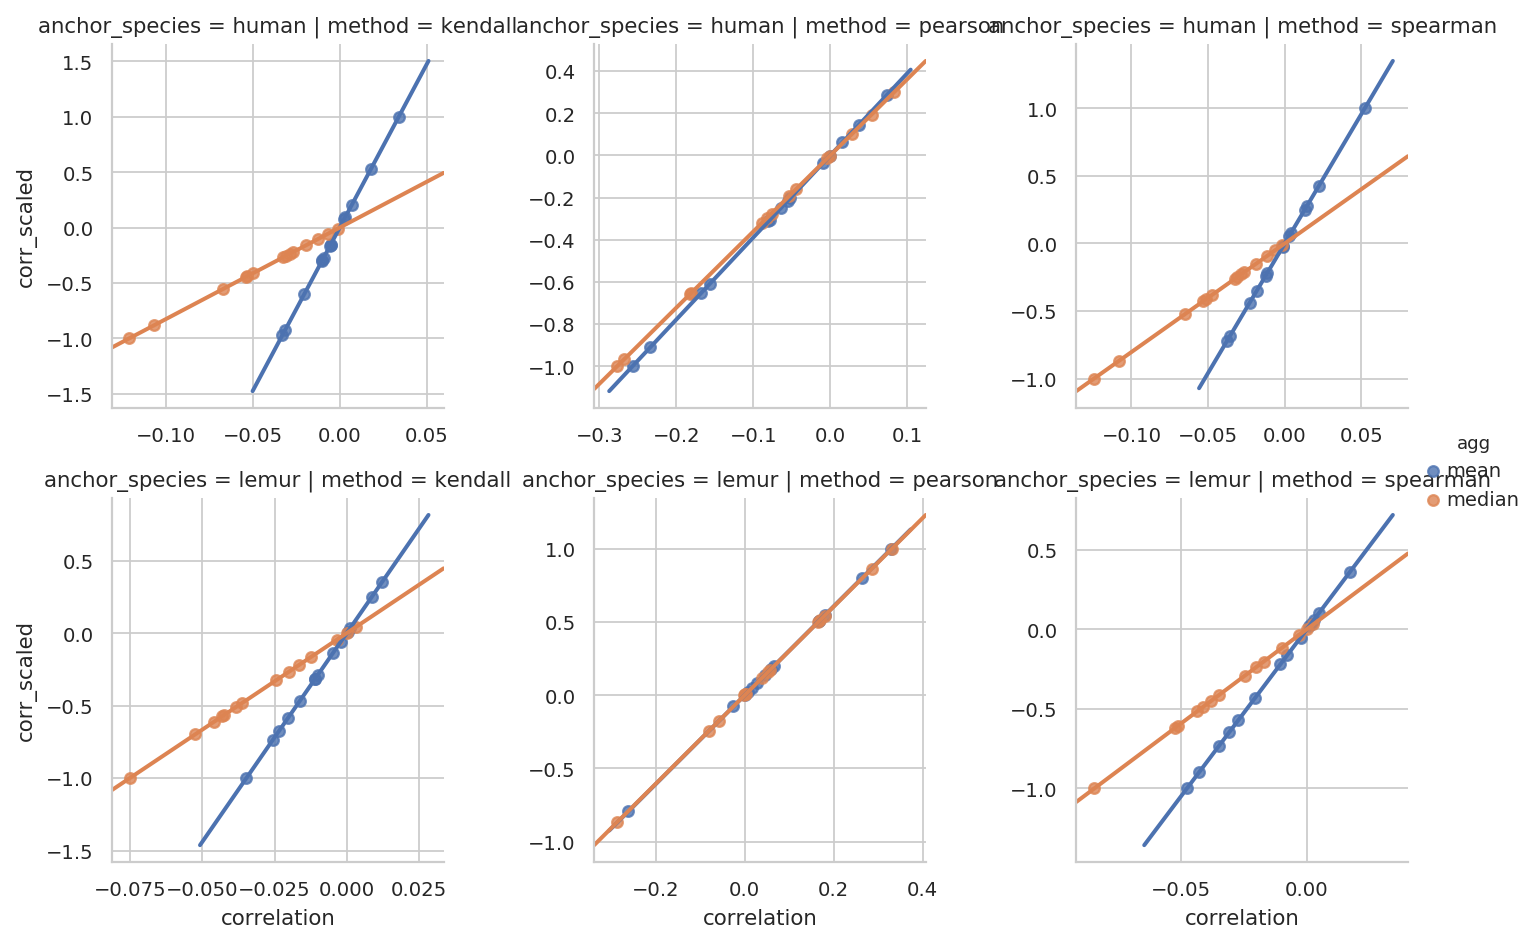

In [20]:
g = sns.FacetGrid(data=agg_df, hue='agg', col='method', row='anchor_species', sharex=False, sharey=False)
g.map(sns.regplot, 'correlation', 'corr_scaled')
g.add_legend()

### Barplot of aggregated, scaled correlation differences

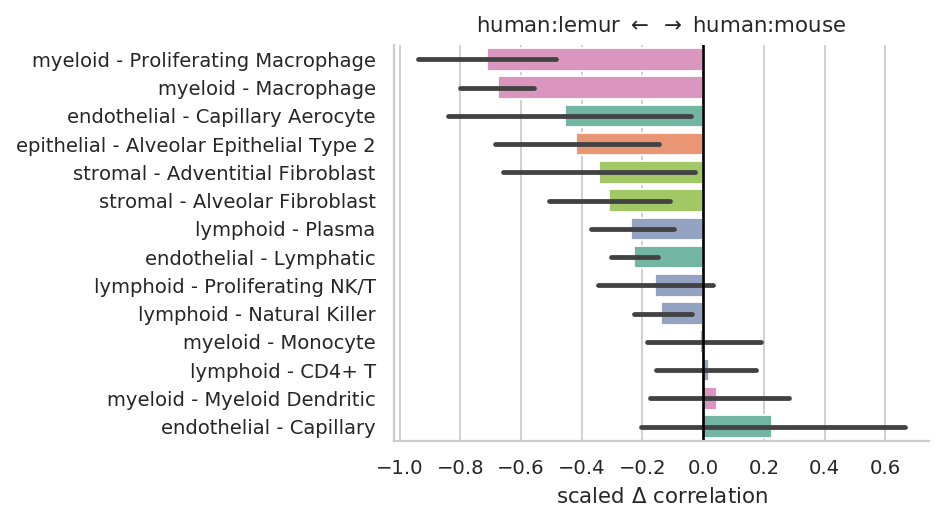

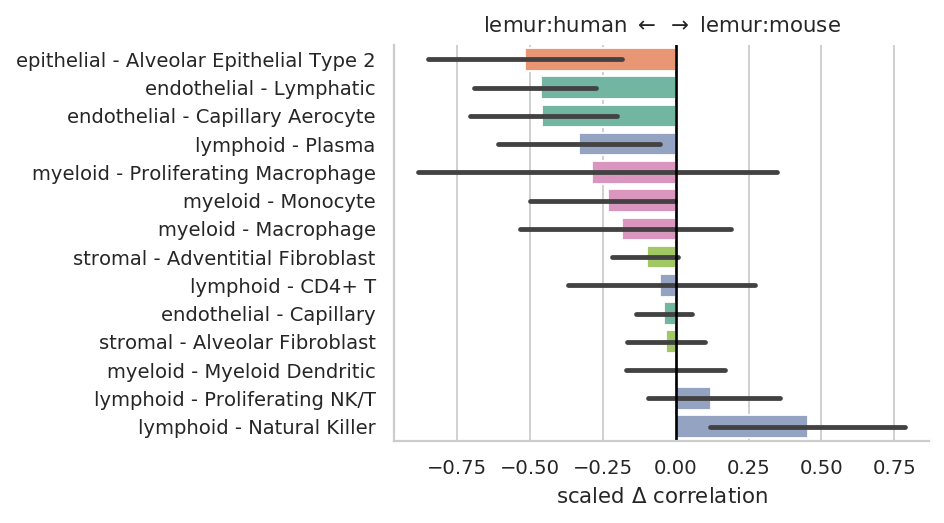

In [21]:
x = 'corr_scaled'
y = 'compartment_narrow'
sns.set(context='paper', style='whitegrid')

for anchor_species, df in agg_df.groupby('anchor_species'):
    order = df.groupby(y)[x].mean().sort_values().index
    colors = {
        x: xspecies.compartment_to_color[x.split(" - ")[0]]
        for x in df.compartment_narrow.unique()
    }
    
    title = narrow_agg_mean._correlation_difference_title(anchor_species)
    
    g = sns.FacetGrid(data=df, aspect=2)
    g.map(sns.barplot, x, y, order=order, palette=colors)
    g.map(plt.axvline, x=0, color="black")
    g.set(xlabel='scaled $\Delta$ correlation', title=title)


### Add t-test vs 0 p-value results

In [22]:
from scipy.stats import ttest_1samp

ttest_results = agg_df.groupby(y)[x].apply(lambda x: pd.Series(ttest_1samp(x, 0), index=['t_statistic', 'p_value']))
ttest_results = ttest_results.unstack()
ttest_results = ttest_results.sort_values('t_statistic')
ttest_results

t_statistic   p_value
compartment_narrow                                            
endothelial - Lymphatic                    -5.015294  0.000393
epithelial - Alveolar Epithelial Type 2    -4.092774  0.001781
endothelial - Capillary Aerocyte           -3.642603  0.003870
lymphoid - Plasma                          -3.326463  0.006753
myeloid - Macrophage                       -3.227372  0.008053
myeloid - Proliferating Macrophage         -2.582187  0.025491
stromal - Alveolar Fibroblast              -2.176417  0.052190
stromal - Adventitial Fibroblast           -2.144400  0.055182
myeloid - Monocyte                         -1.371802  0.197455
lymphoid - Proliferating NK/T              -0.198691  0.846129
lymphoid - CD4+ T                          -0.166333  0.870913
myeloid - Myeloid Dendritic                 0.297959  0.771287
endothelial - Capillary                     0.733605  0.478534
lymphoid - Natural Killer                   1.218223  0.248623

In [23]:
ttest_results.query('p_value < 1e-1')

t_statistic   p_value
compartment_narrow                                            
endothelial - Lymphatic                    -5.015294  0.000393
epithelial - Alveolar Epithelial Type 2    -4.092774  0.001781
endothelial - Capillary Aerocyte           -3.642603  0.003870
lymphoid - Plasma                          -3.326463  0.006753
myeloid - Macrophage                       -3.227372  0.008053
myeloid - Proliferating Macrophage         -2.582187  0.025491
stromal - Alveolar Fibroblast              -2.176417  0.052190
stromal - Adventitial Fibroblast           -2.144400  0.055182

In [24]:
def add_significance_stars(order, pvalues, level3=1e-3, level2=1e-2, level1=1e-1):
    ylabels = []

    for ylabel in order:
        if pvalues[ylabel] < 1e-3:
            ylabel += ' ***'
        elif pvalues[ylabel] < 1e-2:
            ylabel += ' **'
        elif pvalues[ylabel] < 1e-1:
            ylabel += ' *'
        ylabels.append(ylabel)
    return ylabels

ylabels = add_significance_stars(order, ttest_results.p_value)
ylabels

['epithelial - Alveolar Epithelial Type 2 **',
 'endothelial - Lymphatic ***',
 'endothelial - Capillary Aerocyte **',
 'lymphoid - Plasma **',
 'myeloid - Proliferating Macrophage *',
 'myeloid - Monocyte',
 'myeloid - Macrophage **',
 'stromal - Adventitial Fibroblast *',
 'lymphoid - CD4+ T',
 'endothelial - Capillary',
 'stromal - Alveolar Fibroblast *',
 'myeloid - Myeloid Dendritic',
 'lymphoid - Proliferating NK/T',
 'lymphoid - Natural Killer']

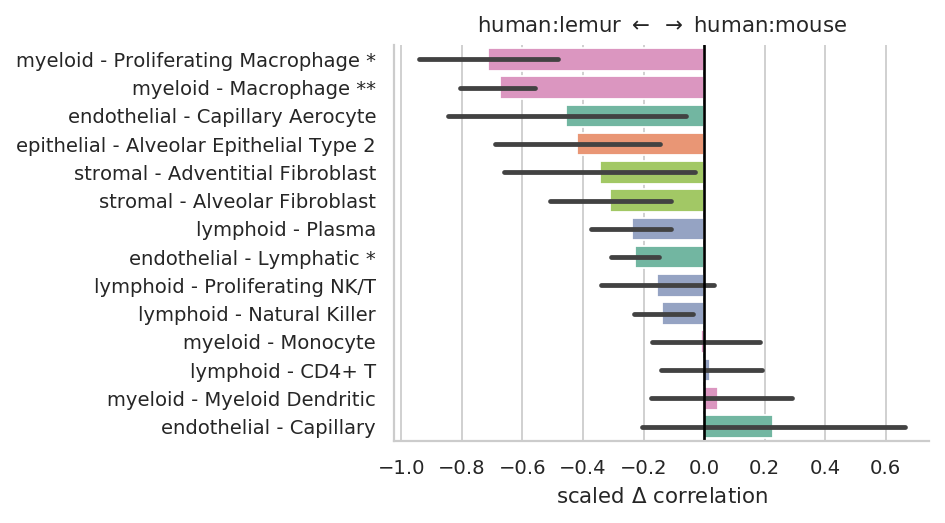

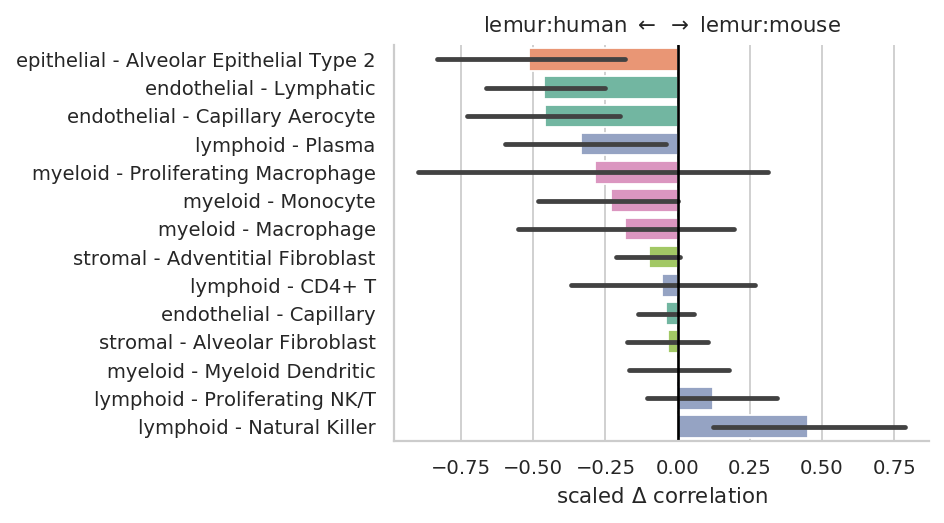

In [25]:
x = 'corr_scaled'
y = 'compartment_narrow'
sns.set(context='paper', style='whitegrid')

for anchor_species, df in agg_df.groupby('anchor_species'):
    order = df.groupby(y)[x].mean().sort_values().index
    colors = {
        x: xspecies.compartment_to_color[x.split(" - ")[0]]
        for x in df.compartment_narrow.unique()
    }
    ttest_results = df.groupby(y)[x].apply(lambda x: pd.Series(ttest_1samp(x, 0), index=['t_statistic', 'p_value']))
    ttest_results = ttest_results.unstack()
    # Do simple bonferonni correction for multiple hypothesis testing
    pvalues = ttest_results.p_value * len(ttest_results.p_value)

    ylabels = add_significance_stars(order, pvalues)

    title = narrow_agg_mean._correlation_difference_title(anchor_species)
    
    g = sns.FacetGrid(data=df, aspect=2)
    g.map(sns.barplot, x, y, order=order, palette=colors)
    g.map(plt.axvline, x=0, color="black")
    g.set(xlabel='scaled $\Delta$ correlation', title=title, yticklabels=ylabels)


In [26]:
ttest_results

t_statistic   p_value
compartment_narrow                                            
endothelial - Capillary                    -0.706201  0.511601
endothelial - Capillary Aerocyte           -3.062087  0.028035
endothelial - Lymphatic                    -3.976445  0.010568
epithelial - Alveolar Epithelial Type 2    -2.821359  0.037049
lymphoid - CD4+ T                          -0.280117  0.790607
lymphoid - Natural Killer                   2.446466  0.058189
lymphoid - Plasma                          -2.063344  0.094032
lymphoid - Proliferating NK/T               0.928686  0.395675
myeloid - Macrophage                       -0.830567  0.444055
myeloid - Monocyte                         -1.682672  0.153263
myeloid - Myeloid Dendritic                 0.043183  0.967227
myeloid - Proliferating Macrophage         -0.800495  0.459752
stromal - Adventitial Fibroblast           -1.504140  0.192875
stromal - Alveolar Fibroblast              -0.433869  0.682466

## Write narrow medians, nonzero to parquet

In [27]:
for d in outdirs:
    narrow_agg_median.aggregated_nonzero.to_csv(f'{d}/narrow_medians_nonzero.csv')